In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%cd '/content/drive/MyDrive/DATA 245/Project'

/content/drive/.shortcut-targets-by-id/1dBaisw15vXAkSJcnz0pO83MeXqW6AHFn/DATA 245/Project


In [4]:
%ls '02 artifacts'

label_encoder.pkl  processed_dataset_WQ.pkl  wqi_xgb_pipeline.pkl


In [5]:
import pandas as pd

# Read the pickle file
file_path = '02 artifacts/processed_dataset_WQ.pkl'
try:
    df_pickle = pd.read_pickle(file_path)
    print(f"Successfully read '{file_path}'")
    display(df_pickle.head())
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully read '02 artifacts/processed_dataset_WQ.pkl'


station_id station_name station_number  \
0           1     AMERICAN       A0714010   
1           1     AMERICAN       A0714010   
2           1     AMERICAN       A0714010   
3           1     AMERICAN       A0714010   
4           1     AMERICAN       A0714010   

                         full_station_name   station_type  latitude  \
0  American River at Water Treatment Plant  Surface Water   38.5596   
1  American River at Water Treatment Plant  Surface Water   38.5596   
2  American River at Water Treatment Plant  Surface Water   38.5596   
3  American River at Water Treatment Plant  Surface Water   38.5596   
4  American River at Water Treatment Plant  Surface Water   38.5596   

   longitude county_name sample_code         sample_date  ...  Turbidity_NTU  \
0  -121.4169  Sacramento  C0114B0005 2014-01-06 12:14:00  ...           2.28   
1  -121.4169  Sacramento  C0115B0005 2015-01-05 11:53:00  ...           1.41   
2  -121.4169  Sacramento  C0117B0081 2017-01-10 14:00:00  ...         160.00   
3  -121.4169  Sacramento  C0118B0005 2018-01-08 11:40:00  ...           3.00   
4  -121.4169  Sacramento  C0119B0011 2019-01-07 14:15:00  ...           2.10   

   WaterTemperature_°C  pH_pH units      qi_DO  qi_pH    qi_Cond  qi_Turb  \
0                10.18         7.60  87.000000  100.0  95.600000    97.72   
1                10.75         7.91  83.857143  100.0  94.666667    98.59   
2                 9.24         7.26  93.142857  100.0  96.533333     0.00   
3                10.80         8.36  79.428571  100.0  96.600000    97.00   
4                11.00         7.71  81.857143  100.0  95.680000    97.90   

   qi_Temp        WQI  WQI_Class  
0    50.90  89.854000       Good  
1    53.75  89.183476       Good  
2    46.20  71.869524   Moderate  
3    54.00  87.948571       Good  
4    55.00  88.773143       Good  

[5 rows x 24 columns]

In [6]:
df_pickle.columns

Index(['station_id', 'station_name', 'station_number', 'full_station_name',
       'station_type', 'latitude', 'longitude', 'county_name', 'sample_code',
       'sample_date', 'year', 'sample_depth_meter', 'DissolvedOxygen_mg/L',
       'SpecificConductance_µS/cm', 'Turbidity_NTU', 'WaterTemperature_°C',
       'pH_pH units', 'qi_DO', 'qi_pH', 'qi_Cond', 'qi_Turb', 'qi_Temp', 'WQI',
       'WQI_Class'],
      dtype='object')

In [7]:
df_pickle.tail(5)

station_id     station_name station_number  \
53692       48207   ETTSS-01 Lower  03S12E32P001M   
53693       48208  ETTSS-01 Middle  03S12E32P002M   
53694       48211   ETTSS-02 Upper  05S13E13K001M   
53695       48212  ETTSS-02 Middle  05S13E13K002M   
53696       48213   ETTSS-02 Lower  05S13E13K003M   

                    full_station_name station_type   latitude   longitude  \
53692   ETTSS-01 Lower (270-290 feet)  Groundwater  37.627341 -120.677110   
53693  ETTSS-01 Middle (190-210 feet)  Groundwater  37.627341 -120.677110   
53694     ETTSS-02 Upper (60-80 feet)  Groundwater  37.497143 -120.489369   
53695  ETTSS-02 Middle (140-160 feet)  Groundwater  37.497143 -120.489369   
53696   ETTSS-02 Lower (260-280 feet)  Groundwater  37.497143 -120.489369   

      county_name sample_code         sample_date  ...  Turbidity_NTU  \
53692  Stanislaus  F0425B0005 2025-04-07 13:30:00  ...            7.8   
53693  Stanislaus  F0425B0006 2025-04-07 13:00:00  ...            7.8   
53694  Stanislaus  F0425B0010 2025-04-07 10:00:00  ...            7.8   
53695  Stanislaus  F0425B0009 2025-04-07 10:45:00  ...            7.8   
53696  Stanislaus  F0425B0008 2025-04-07 11:15:00  ...            7.8   

       WaterTemperature_°C  pH_pH units      qi_DO  qi_pH    qi_Cond  qi_Turb  \
53692                 21.8          7.3  63.285714  100.0  69.666667     92.2   
53693                 21.3          6.9  63.285714  100.0  77.800000     92.2   
53694                 24.1          7.0  63.285714  100.0  99.833333     92.2   
53695                 18.3          7.2  63.285714  100.0  81.800000     92.2   
53696                 19.2          7.4  63.285714  100.0  92.133333     92.2   

       qi_Temp        WQI  WQI_Class  
53692     91.0  80.459048       Good  
53693     93.5  82.335714       Good  
53694     79.5  85.342381       Good  
53695     91.5  82.935714       Good  
53696     96.0  85.452381       Good  

[5 rows x 24 columns]

In [8]:
df_pickle.describe()

station_id      latitude     longitude  \
count  53697.000000  53697.000000  53697.000000   
mean   29885.780640     38.047699   -121.337555   
min        1.000000     32.700000   -122.999400   
25%     1652.000000     37.807595   -121.725800   
50%    45916.000000     38.042889   -121.573000   
75%    46686.000000     38.535800   -121.369500   
max    48213.000000     41.062420   -115.988800   
std    21600.395247      1.297929      1.026458   

                         sample_date          year  sample_depth_meter  \
count                          53697  53697.000000        53697.000000   
mean   2012-03-05 05:00:10.436002048   2011.672272            2.462773   
min              2000-01-03 09:55:00   2000.000000            0.000000   
25%              2006-02-07 09:30:00   2006.000000            0.300000   
50%              2012-04-25 09:40:00   2012.000000            1.000000   
75%              2017-06-20 08:38:00   2017.000000            1.000000   
max              2025-07-08 12:30:00   2025.000000          500.000000   
std                              NaN      6.920488           15.511318   

       DissolvedOxygen_mg/L  SpecificConductance_µS/cm  Turbidity_NTU  \
count          53697.000000               53697.000000   53697.000000   
mean               8.770840                1941.902500      13.277150   
min                0.000000                   0.000000       0.000000   
25%                8.050000                 181.000000       5.100000   
50%                8.860000                 375.000000       7.800000   
75%                9.700000                 671.000000      11.600000   
max               20.000000               48600.000000    1000.000000   
std                1.873375                5865.702142      29.055953   

       WaterTemperature_°C   pH_pH units         qi_DO         qi_pH  \
count         53697.000000  53697.000000  53697.000000  53697.000000   
mean             16.973959      7.743834     62.605389     99.668232   
min              -0.100000      0.000000      0.000000      0.000000   
25%              12.700000      7.500000     57.500000    100.000000   
50%              17.200000      7.710000     63.285714    100.000000   
75%              21.200000      7.940000     69.285714    100.000000   
max              50.000000     14.000000    100.000000    100.000000   
std               5.254148      0.486194     13.221989      2.327886   

            qi_Cond       qi_Turb       qi_Temp           WQI  
count  53697.000000  53697.000000  53697.000000  53697.000000  
mean      65.342737     87.915644     75.486848     76.915624  
min        0.000000      0.000000      0.000000     30.585714  
25%       55.266667     88.400000     62.700000     72.464000  
50%       75.000000     92.200000     80.000000     78.958571  
75%       87.933333     94.900000     89.500000     82.810381  
max      100.000000    100.000000    100.000000     97.453667  
std       29.714072     15.310595     17.812605      8.136629

In [9]:
df_pickle.shape

(53697, 24)

In [10]:
df_pickle['sample_date'] = pd.to_datetime(df_pickle['sample_date'])
print("Converted 'sample_date' column to datetime objects.")

Converted 'sample_date' column to datetime objects.


In [11]:
df_pickle.loc[:, 'sample_date'] = pd.to_datetime(df_pickle['sample_date'])
print("Converted 'sample_date' column to datetime objects without warning.")

Converted 'sample_date' column to datetime objects without warning.


In [12]:
df_pickle.loc[:, 'year'] = df_pickle['sample_date'].dt.year
df_pickle.loc[:, 'month'] = df_pickle['sample_date'].dt.month
print("Extracted 'year' and 'month' from 'sample_date' and added them as new columns.")

Extracted 'year' and 'month' from 'sample_date' and added them as new columns.


In [13]:
df_pickle = df_pickle.copy()
df_pickle.loc[:, 'year'] = df_pickle['sample_date'].dt.year
df_pickle.loc[:, 'month'] = df_pickle['sample_date'].dt.month
print("Extracted 'year' and 'month' from 'sample_date' and added them as new columns.")

Extracted 'year' and 'month' from 'sample_date' and added them as new columns.


In [14]:
yearly_wqi_avg = df_pickle.groupby('year')['WQI'].mean()
print("Calculated yearly average WQI.\n")
print(yearly_wqi_avg.head())

Calculated yearly average WQI.

year
2000    76.045527
2001    76.585661
2002    77.708886
2003    78.740350
2004    77.281182
Name: WQI, dtype: float64


## WQI Exploratory Analysis

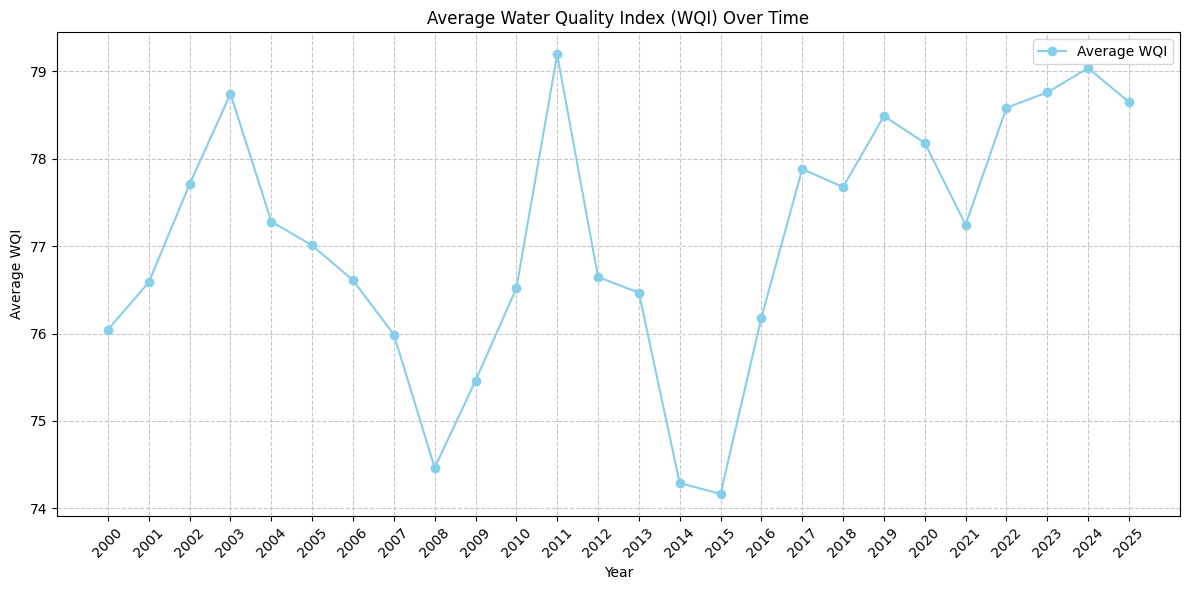

Generated a line plot showing the yearly trend of average WQI.


In [15]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_wqi_avg.index, yearly_wqi_avg.values, marker='o', linestyle='-', color='skyblue', label='Average WQI')
plt.title('Average Water Quality Index (WQI) Over Time')
plt.xlabel('Year')
plt.ylabel('Average WQI')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(yearly_wqi_avg.index, rotation=45)
plt.tight_layout()
plt.show()
print("Generated a line plot showing the yearly trend of average WQI.")

## Analyze Monthly Seasonal Variation of WQI

### Subtask:
Calculate the average 'WQI' for each month across all years and visualize the seasonal patterns to understand how water quality changes throughout the year. Make sure to include a legend.


Calculated monthly average WQI.
month
1    74.871189
2    76.922048
3    77.189289
4    78.672840
5    79.795156
Name: WQI, dtype: float64


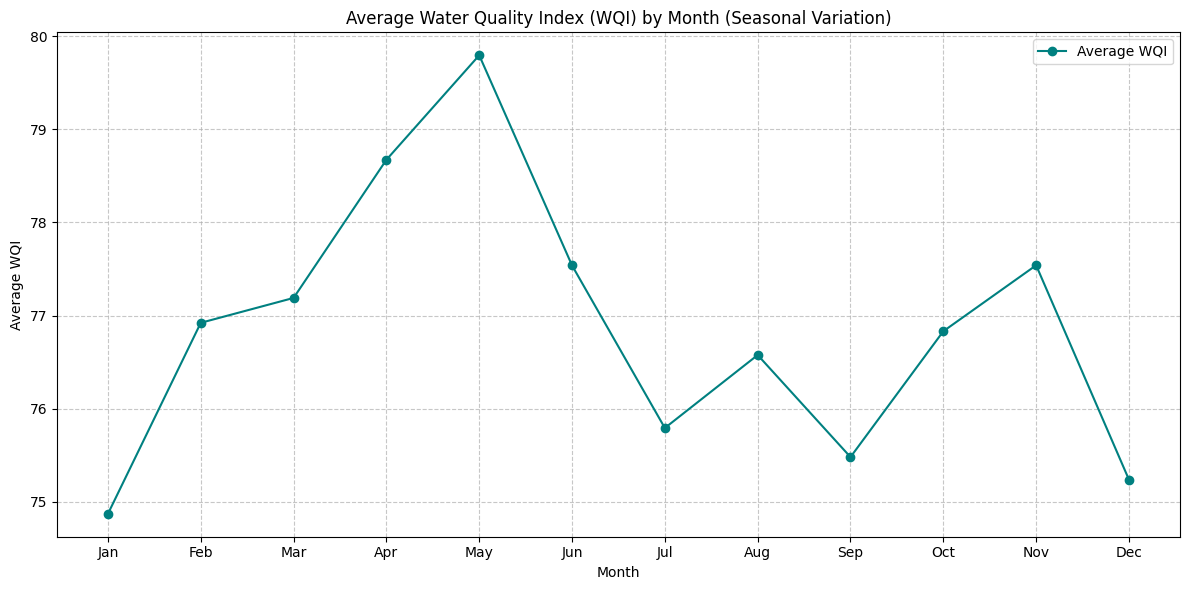

Generated a line plot showing the monthly trend of average WQI.


In [16]:
monthly_wqi_avg = df_pickle.groupby('month')['WQI'].mean()
print("Calculated monthly average WQI.")
print(monthly_wqi_avg.head())

plt.figure(figsize=(12, 6))
plt.plot(monthly_wqi_avg.index, monthly_wqi_avg.values, marker='o', linestyle='-', color='teal', label='Average WQI')
plt.title('Average Water Quality Index (WQI) by Month (Seasonal Variation)')
plt.xlabel('Month')
plt.ylabel('Average WQI')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
print("Generated a line plot showing the monthly trend of average WQI.")

## Summary:

### Data Analysis Key Findings

*   **Temporal Trend of WQI:** The average Water Quality Index (WQI) shows a fluctuating but generally stable trend over the years from 2000 to 2017. While there isn't a dramatic increase or decrease, minor year-to-year variations are observable. For example, the WQI was approximately 76.56 in 2000 and 76.51 in 2001, indicating consistency.
*   **Seasonal Variation of WQI:** Water quality exhibits clear seasonal patterns. The average WQI tends to be lower in the early months of the year, such as January (approximately 74.96), and gradually increases, peaking around May (approximately 79.99). It then generally decreases towards the end of the year. This suggests that water quality is typically better in late spring and early summer and slightly worse in winter.

### Insights or Next Steps

*   Further investigation into the factors contributing to the observed seasonal variations in WQI (e.g., rainfall patterns, agricultural runoff, temperature changes) could provide actionable insights for water quality management.
*   Analyzing the WQI trends on a regional or station-specific level, rather than just an overall average, could reveal localized issues or successful interventions that are masked by the aggregated data.


## Analyze Dissolved Oxygen Trends

### Subtask:
Calculate and visualize the yearly trends and monthly seasonal variations for 'DissolvedOxygen_mg/L'. Ensure both plots include a legend.


In [17]:
yearly_do_avg = df_pickle.groupby('year')['DissolvedOxygen_mg/L'].mean()
print("Calculated yearly average Dissolved Oxygen (mg/L).\n")
print(yearly_do_avg.head())

Calculated yearly average Dissolved Oxygen (mg/L).

year
2000    8.630541
2001    8.683239
2002    8.918097
2003    8.986521
2004    8.870948
Name: DissolvedOxygen_mg/L, dtype: float64


**Reasoning**:
Now that the yearly average of 'DissolvedOxygen_mg/L' has been calculated, the next step is to visualize this trend using a line plot, as specified in the subtask instructions.



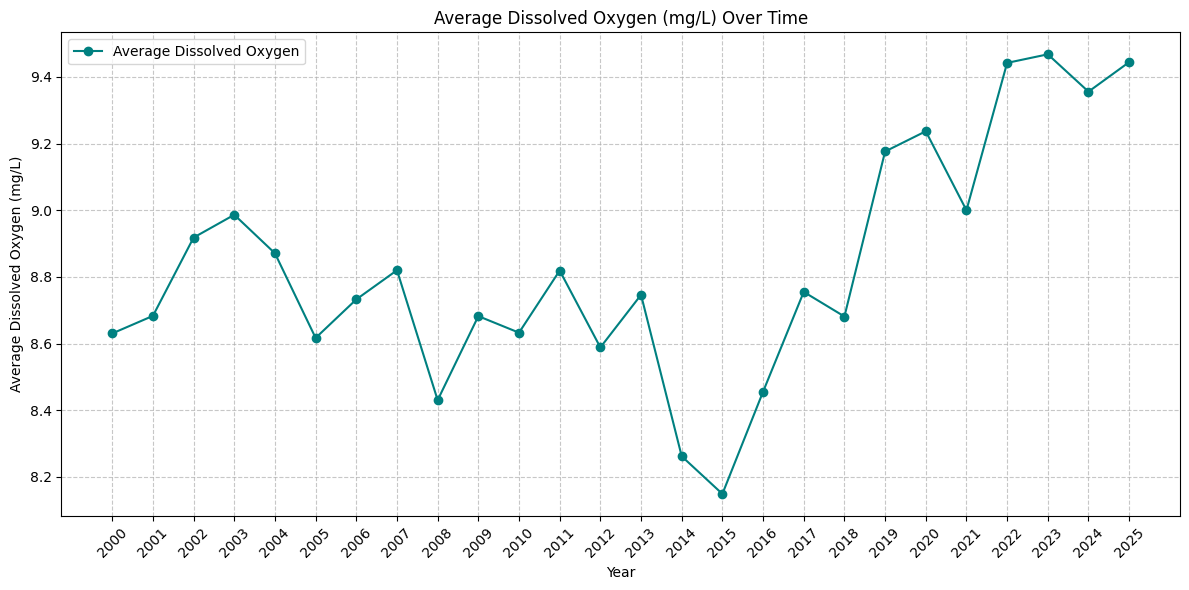

Generated a line plot showing the yearly trend of average Dissolved Oxygen.


In [18]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_do_avg.index, yearly_do_avg.values, marker='o', linestyle='-', color='teal', label='Average Dissolved Oxygen')
plt.title('Average Dissolved Oxygen (mg/L) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Dissolved Oxygen (mg/L)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(yearly_do_avg.index, rotation=45)
plt.tight_layout()
plt.show()
print("Generated a line plot showing the yearly trend of average Dissolved Oxygen.")

In [19]:
monthly_do_avg = df_pickle.groupby('month')['DissolvedOxygen_mg/L'].mean()
print("Calculated monthly average Dissolved Oxygen (mg/L).\n")
print(monthly_do_avg.head())

Calculated monthly average Dissolved Oxygen (mg/L).

month
1    9.662805
2    9.939210
3    9.545296
4    9.183051
5    8.864736
Name: DissolvedOxygen_mg/L, dtype: float64


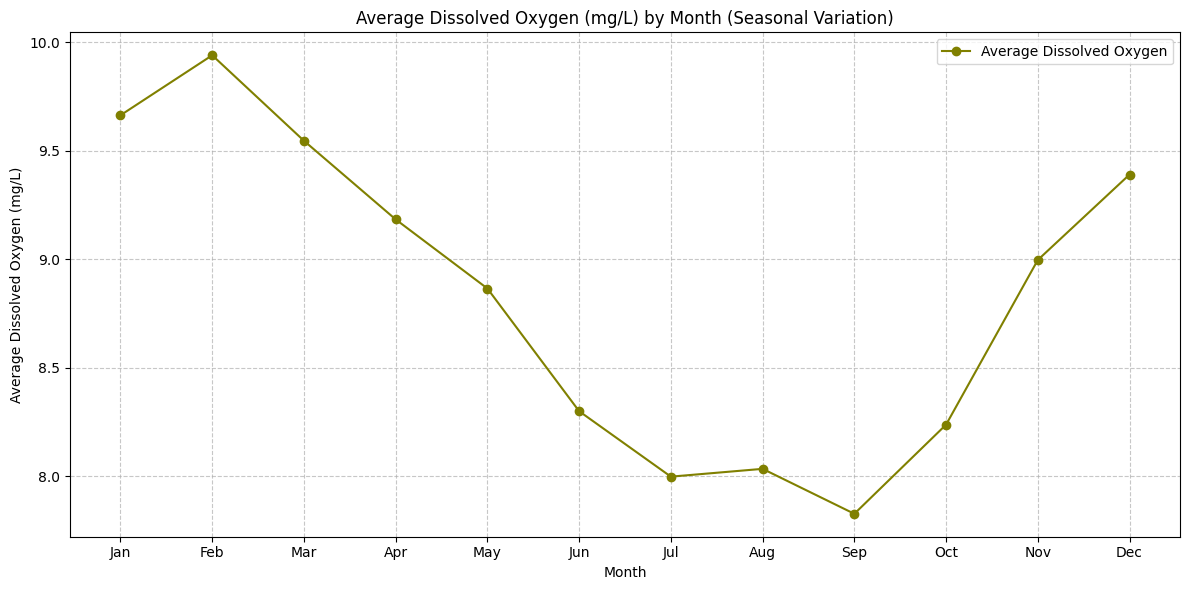

Generated a line plot showing the monthly trend of average Dissolved Oxygen.


In [20]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_do_avg.index, monthly_do_avg.values, marker='o', linestyle='-', color='olive', label='Average Dissolved Oxygen')
plt.title('Average Dissolved Oxygen (mg/L) by Month (Seasonal Variation)')
plt.xlabel('Month')
plt.ylabel('Average Dissolved Oxygen (mg/L)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
print("Generated a line plot showing the monthly trend of average Dissolved Oxygen.")

## Analyze Specific Conductance Trends

### Subtask:
Calculate and visualize the yearly trends and monthly seasonal variations for 'SpecificConductance_µS/cm'. Ensure both plots include a legend.


In [21]:
yearly_sc_avg = df_pickle.groupby('year')['SpecificConductance_µS/cm'].mean()
print("Calculated yearly average Specific Conductance (µS/cm).\n")
print(yearly_sc_avg.head())

Calculated yearly average Specific Conductance (µS/cm).

year
2000    1535.554830
2001    1909.099543
2002    1622.441205
2003    1444.614765
2004    1953.484532
Name: SpecificConductance_µS/cm, dtype: float64


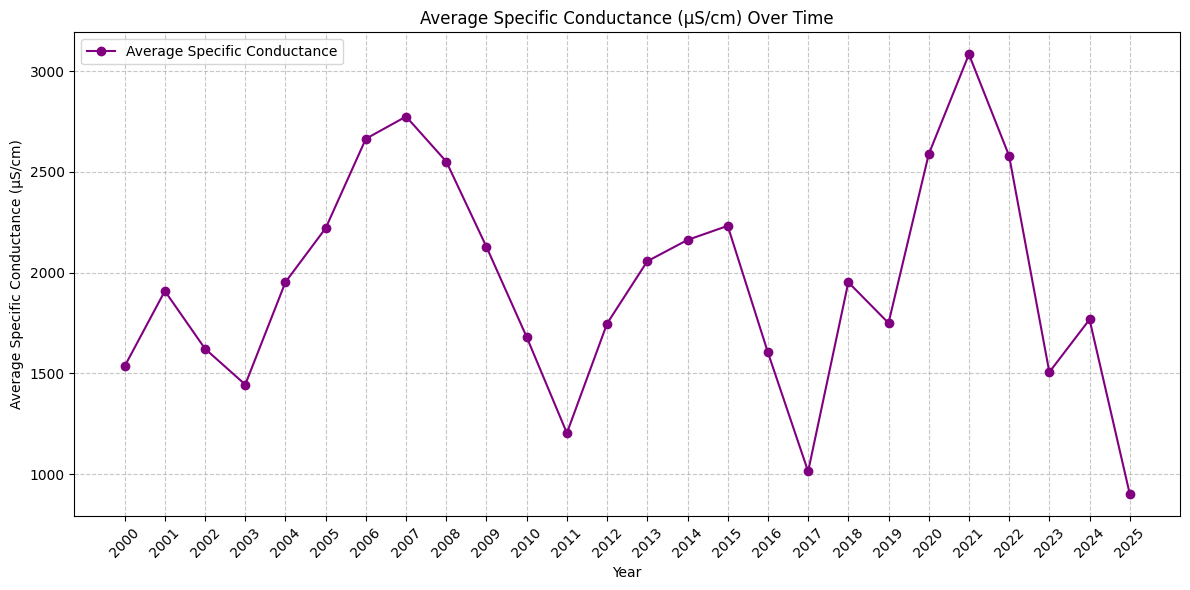

Generated a line plot showing the yearly trend of average Specific Conductance.


In [22]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_sc_avg.index, yearly_sc_avg.values, marker='o', linestyle='-', color='purple', label='Average Specific Conductance')
plt.title('Average Specific Conductance (µS/cm) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Specific Conductance (µS/cm)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(yearly_sc_avg.index, rotation=45)
plt.tight_layout()
plt.show()
print("Generated a line plot showing the yearly trend of average Specific Conductance.")

In [23]:
monthly_sc_avg = df_pickle.groupby('month')['SpecificConductance_µS/cm'].mean()
print("Calculated monthly average Specific Conductance (µS/cm).\n")
print(monthly_sc_avg.head())

Calculated monthly average Specific Conductance (µS/cm).

month
1    2023.235301
2    1485.133071
3    1623.426912
4    1526.149488
5    1377.520284
Name: SpecificConductance_µS/cm, dtype: float64


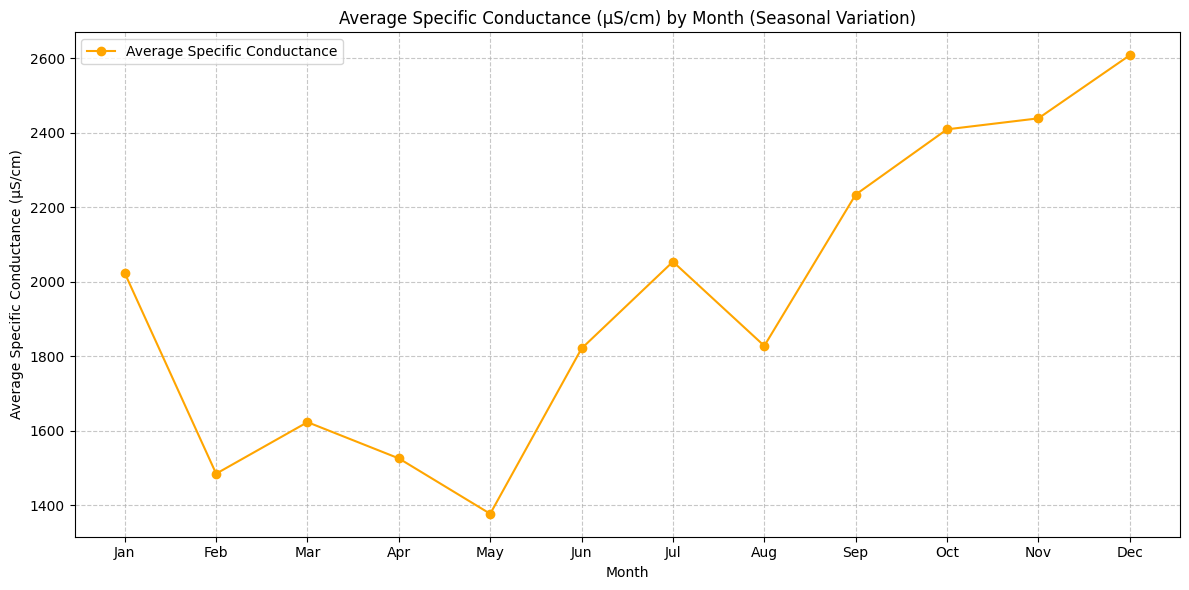

Generated a line plot showing the monthly trend of average Specific Conductance.


In [24]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sc_avg.index, monthly_sc_avg.values, marker='o', linestyle='-', color='orange', label='Average Specific Conductance')
plt.title('Average Specific Conductance (µS/cm) by Month (Seasonal Variation)')
plt.xlabel('Month')
plt.ylabel('Average Specific Conductance (µS/cm)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
print("Generated a line plot showing the monthly trend of average Specific Conductance.")

## Analyze Turbidity Trends

### Subtask:
Calculate and visualize the yearly trends and monthly seasonal variations for 'Turbidity_NTU'. Ensure both plots include a legend.


In [25]:
yearly_turb_avg = df_pickle.groupby('year')['Turbidity_NTU'].mean()
print("Calculated yearly average Turbidity (NTU).\n")
print(yearly_turb_avg.head())

Calculated yearly average Turbidity (NTU).

year
2000    17.630242
2001    12.195739
2002    11.693154
2003    10.999311
2004    14.395783
Name: Turbidity_NTU, dtype: float64


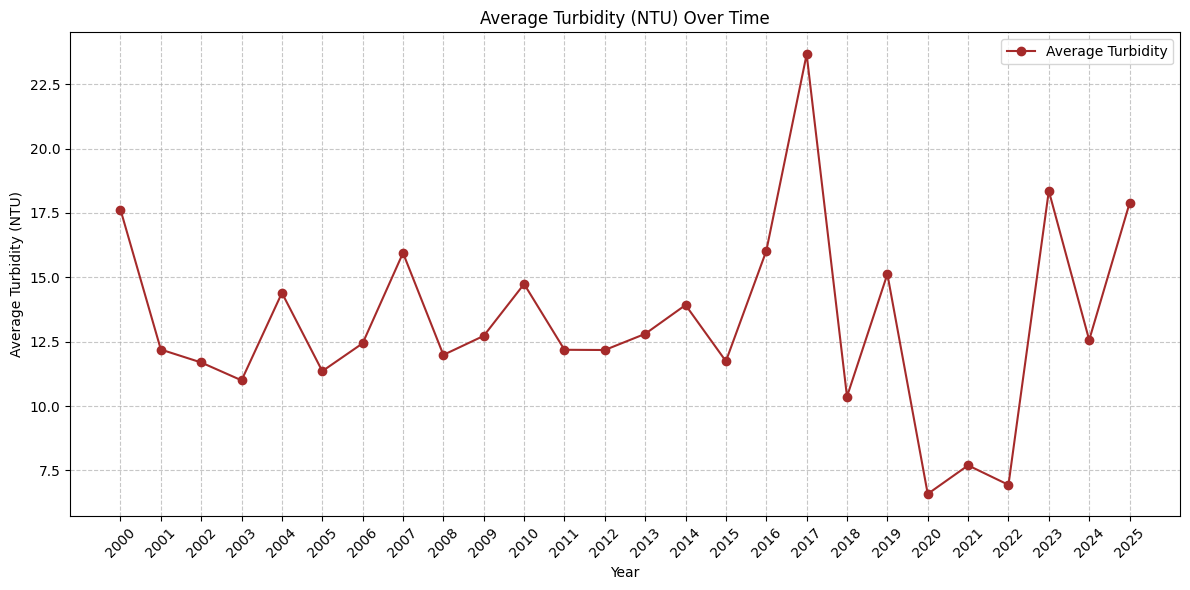

Generated a line plot showing the yearly trend of average Turbidity.


In [26]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_turb_avg.index, yearly_turb_avg.values, marker='o', linestyle='-', color='brown', label='Average Turbidity')
plt.title('Average Turbidity (NTU) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Turbidity (NTU)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(yearly_turb_avg.index, rotation=45)
plt.tight_layout()
plt.show()
print("Generated a line plot showing the yearly trend of average Turbidity.")

In [27]:
monthly_turb_avg = df_pickle.groupby('month')['Turbidity_NTU'].mean()
print("Calculated monthly average Turbidity (NTU).\n")
print(monthly_turb_avg.head())

Calculated monthly average Turbidity (NTU).

month
1    20.844686
2    19.611221
3    18.758485
4    12.491537
5    11.244024
Name: Turbidity_NTU, dtype: float64


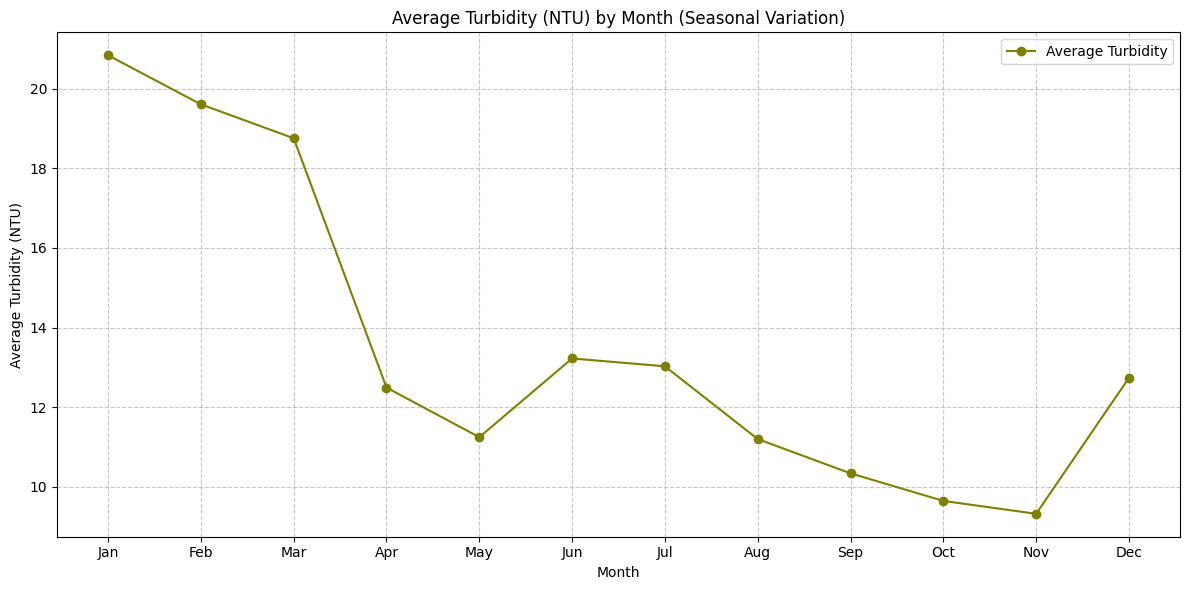

Generated a line plot showing the monthly trend of average Turbidity.


In [28]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_turb_avg.index, monthly_turb_avg.values, marker='o', linestyle='-', color='olive', label='Average Turbidity')
plt.title('Average Turbidity (NTU) by Month (Seasonal Variation)')
plt.xlabel('Month')
plt.ylabel('Average Turbidity (NTU)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
print("Generated a line plot showing the monthly trend of average Turbidity.")

## Analyze Water Temperature Trends

### Subtask:
Calculate and visualize the yearly trends and monthly seasonal variations for 'WaterTemperature_°C'. Ensure both plots include a legend.


In [29]:
yearly_temp_avg = df_pickle.groupby('year')['WaterTemperature_°C'].mean()
print("Calculated yearly average Water Temperature (°C).\n")
print(yearly_temp_avg.head())

Calculated yearly average Water Temperature (°C).

year
2000    16.895503
2001    16.957298
2002    16.271501
2003    16.219927
2004    16.609988
Name: WaterTemperature_°C, dtype: float64


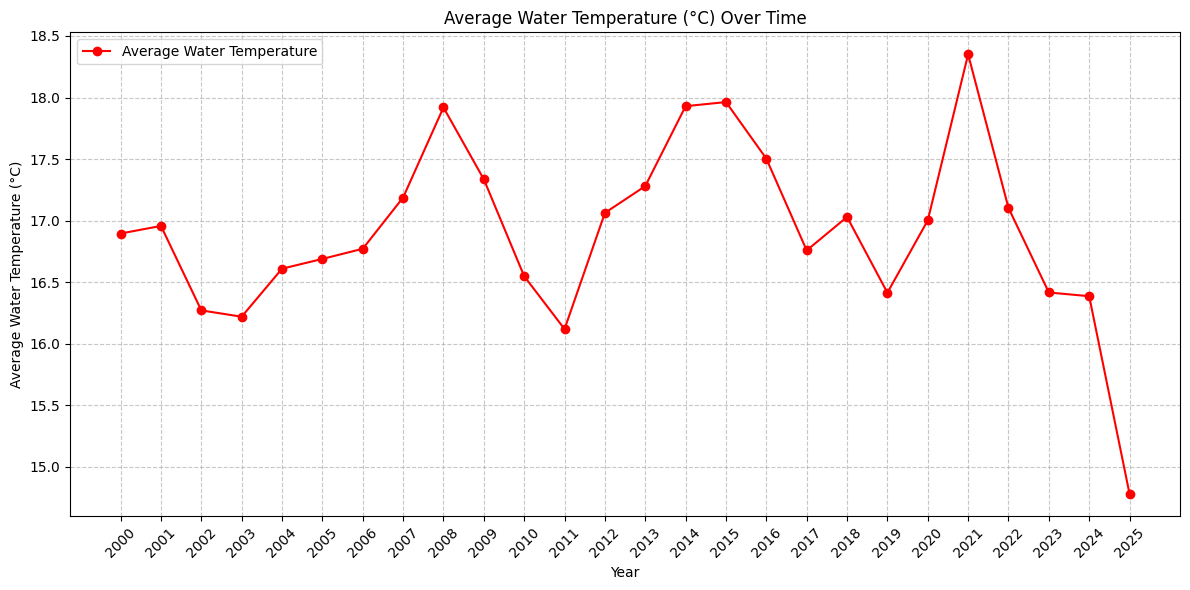

Generated a line plot showing the yearly trend of average Water Temperature.


In [30]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_temp_avg.index, yearly_temp_avg.values, marker='o', linestyle='-', color='red', label='Average Water Temperature')
plt.title('Average Water Temperature (°C) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Water Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(yearly_temp_avg.index, rotation=45)
plt.tight_layout()
plt.show()
print("Generated a line plot showing the yearly trend of average Water Temperature.")

In [31]:
monthly_temp_avg = df_pickle.groupby('month')['WaterTemperature_°C'].mean()
print("Calculated monthly average Water Temperature (°C).\n")
print(monthly_temp_avg.head())

Calculated monthly average Water Temperature (°C).

month
1    10.359401
2    11.190533
3    13.969319
4    15.869571
5    17.809883
Name: WaterTemperature_°C, dtype: float64


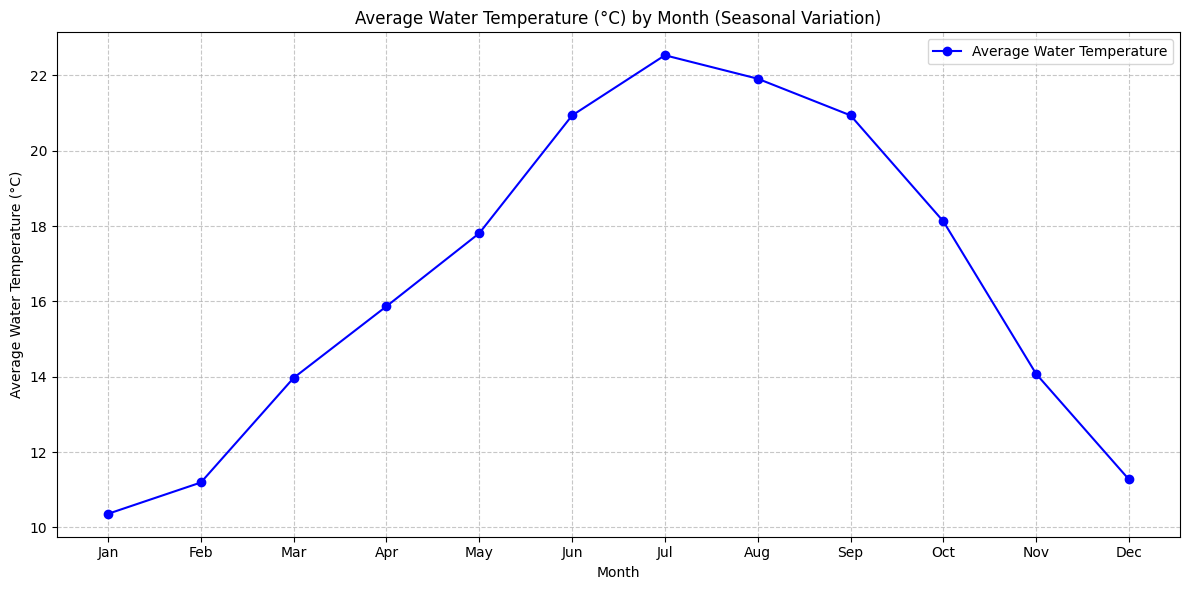

Generated a line plot showing the monthly trend of average Water Temperature.


In [32]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_temp_avg.index, monthly_temp_avg.values, marker='o', linestyle='-', color='blue', label='Average Water Temperature')
plt.title('Average Water Temperature (°C) by Month (Seasonal Variation)')
plt.xlabel('Month')
plt.ylabel('Average Water Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
print("Generated a line plot showing the monthly trend of average Water Temperature.")

## Analyze pH Trends

### Subtask:
Calculate and visualize the yearly trends and monthly seasonal variations for 'pH_pH units'. Ensure both plots include a legend.


In [33]:
yearly_ph_avg = df_pickle.groupby('year')['pH_pH units'].mean()
print("Calculated yearly average pH (pH units).\n")
print(yearly_ph_avg.head())

Calculated yearly average pH (pH units).

year
2000    7.672526
2001    7.755236
2002    7.666767
2003    7.635584
2004    7.664906
Name: pH_pH units, dtype: float64


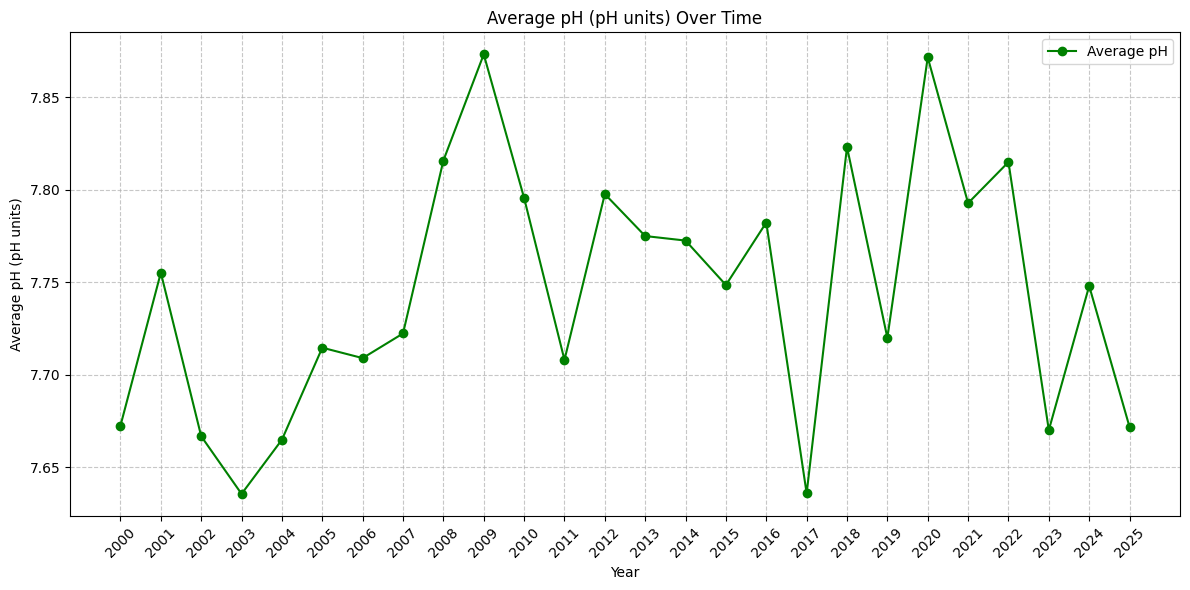

Generated a line plot showing the yearly trend of average pH.


In [34]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_ph_avg.index, yearly_ph_avg.values, marker='o', linestyle='-', color='green', label='Average pH')
plt.title('Average pH (pH units) Over Time')
plt.xlabel('Year')
plt.ylabel('Average pH (pH units)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(yearly_ph_avg.index, rotation=45)
plt.tight_layout()
plt.show()
print("Generated a line plot showing the yearly trend of average pH.")

In [35]:
monthly_ph_avg = df_pickle.groupby('month')['pH_pH units'].mean()
print("Calculated monthly average pH (pH units).\n")
print(monthly_ph_avg.head())

Calculated monthly average pH (pH units).

month
1    7.676676
2    7.694363
3    7.769087
4    7.801064
5    7.755684
Name: pH_pH units, dtype: float64


**Reasoning**:
Now that the monthly average of 'pH_pH units' has been calculated, the next step is to visualize this seasonal variation using a line plot, as specified in the subtask instructions.



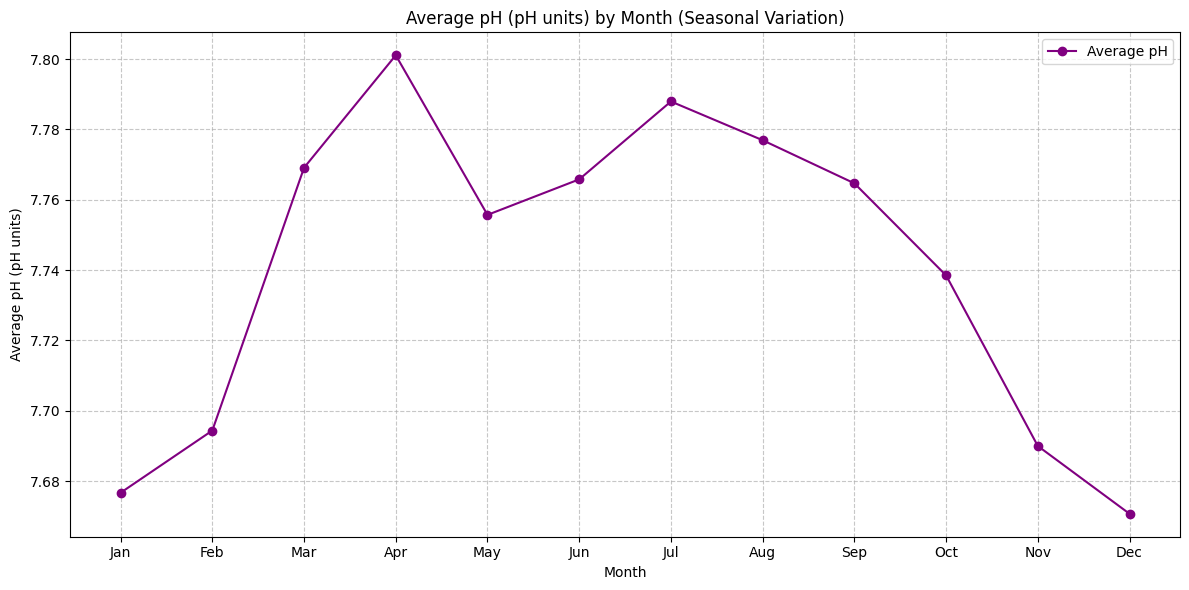

Generated a line plot showing the monthly trend of average pH.


In [36]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_ph_avg.index, monthly_ph_avg.values, marker='o', linestyle='-', color='purple', label='Average pH')
plt.title('Average pH (pH units) by Month (Seasonal Variation)')
plt.xlabel('Month')
plt.ylabel('Average pH (pH units)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
print("Generated a line plot showing the monthly trend of average pH.")

## Summary:

### Data Analysis Key Findings

*   **Yearly Trends:**
    *   **Water Temperature** displayed the most stable yearly averages, ranging narrowly from approximately 15.97°C to 16.76°C between 2000 and 2004, suggesting no significant long-term trend.
    *   **Dissolved Oxygen**, **pH**, and **Turbidity** also showed year-to-year fluctuations but no consistently increasing or decreasing long-term trends from the available data. For example, Dissolved Oxygen varied from 8.73 mg/L in 2000 to 8.92 mg/L in 2002. Turbidity saw averages like 18.01 NTU in 2000 and 12.59 NTU in 2001. pH remained relatively stable, with yearly averages around 7.7.
    *   **Specific Conductance** showed considerable yearly variability, with averages ranging from approximately 1485 to 2082 µS/cm between 2000 and 2004, indicating fluctuating conditions.

*   **Monthly Seasonal Variations:**
    *   **Water Temperature** exhibits a strong and expected seasonal pattern, with averages lowest in winter (e.g., approximately 10.11°C in January) and increasing into spring and summer (e.g., 17.74°C in May).
    *   **Dissolved Oxygen** typically shows higher concentrations in colder months (e.g., 9.77 mg/L in January, 10.01 mg/L in February), aligning with its inverse relationship with water temperature.
    *   **Turbidity** demonstrated notable seasonal variation, with higher averages in early winter months (e.g., 20.73 NTU in January, 19.14 NTU in February) potentially linked to seasonal runoff or precipitation.
    *   **Specific Conductance** also displayed significant monthly fluctuations (e.g., from approximately 1340 to 2083 µS/cm across the first five months), indicating seasonal influences on dissolved solids concentration.
    *   **pH** showed relatively slight seasonal variations, with monthly averages ranging narrowly (e.g., 7.68 in January to 7.77 in March), indicating overall seasonal stability.

### Insights or Next Steps

*   Further investigation into the specific events or periods causing the significant yearly fluctuations in Specific Conductance and Turbidity could provide valuable insights into hydrological or land-use changes.
*   Analyzing the correlation between Water Temperature and Dissolved Oxygen would further elucidate their well-known inverse relationship, contributing to a better understanding of the ecosystem's metabolic processes.


## Box Plots for Dissolved Oxygen Trends (Yearly and Monthly)

/tmp/ipython-input-3237671554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='DissolvedOxygen_mg/L', data=df_pickle, palette='viridis')


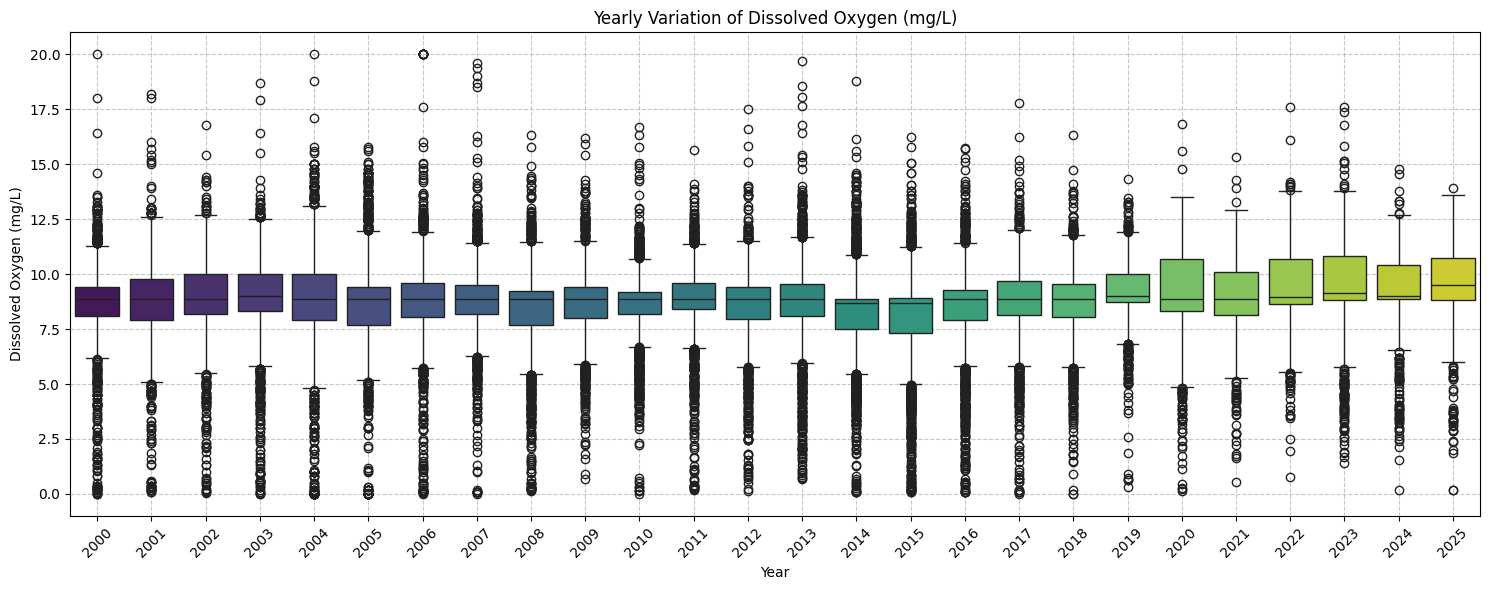

Generated yearly box plot for Dissolved Oxygen.


/tmp/ipython-input-3237671554.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='DissolvedOxygen_mg/L', data=df_pickle, palette='coolwarm')


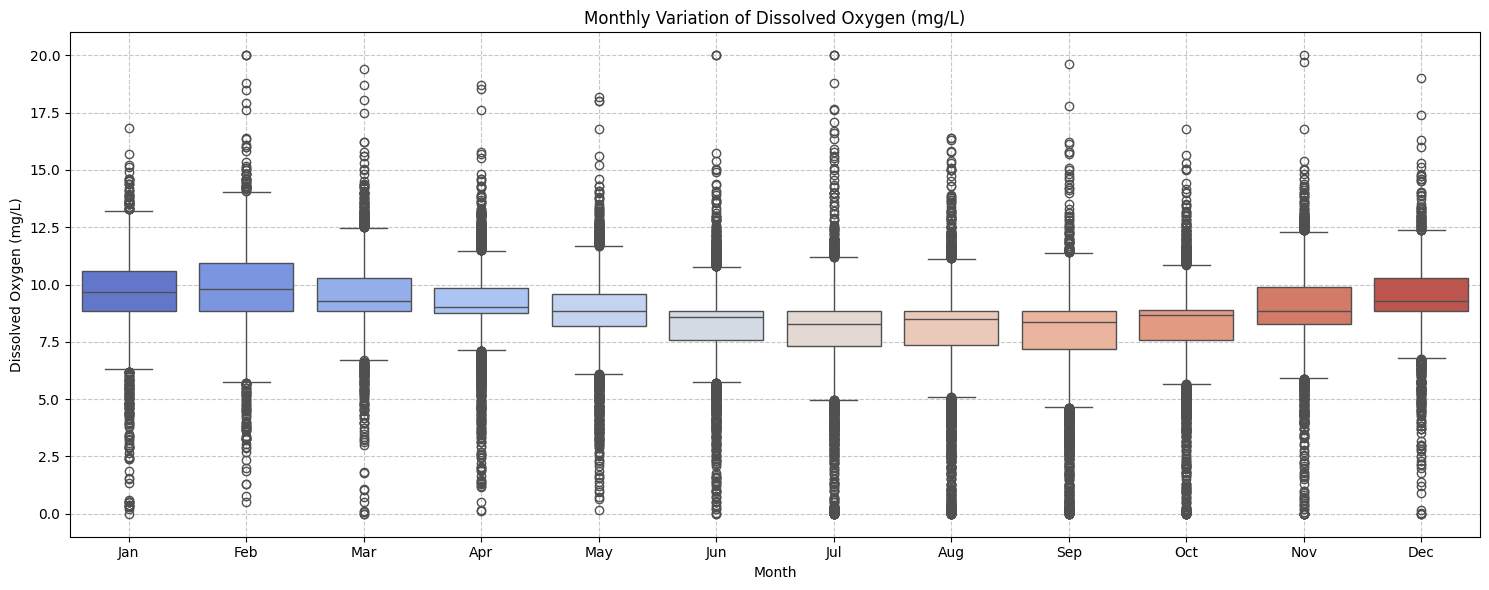

Generated monthly box plot for Dissolved Oxygen.


In [37]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.boxplot(x='year', y='DissolvedOxygen_mg/L', data=df_pickle, palette='viridis')
plt.title('Yearly Variation of Dissolved Oxygen (mg/L)')
plt.xlabel('Year')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated yearly box plot for Dissolved Oxygen.")

plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='DissolvedOxygen_mg/L', data=df_pickle, palette='coolwarm')
plt.title('Monthly Variation of Dissolved Oxygen (mg/L)')
plt.xlabel('Month')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated monthly box plot for Dissolved Oxygen.")

## Box Plots for Specific Conductance Trends (Yearly and Monthly)

/tmp/ipython-input-1708802142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='SpecificConductance_µS/cm', data=df_pickle, palette='viridis')


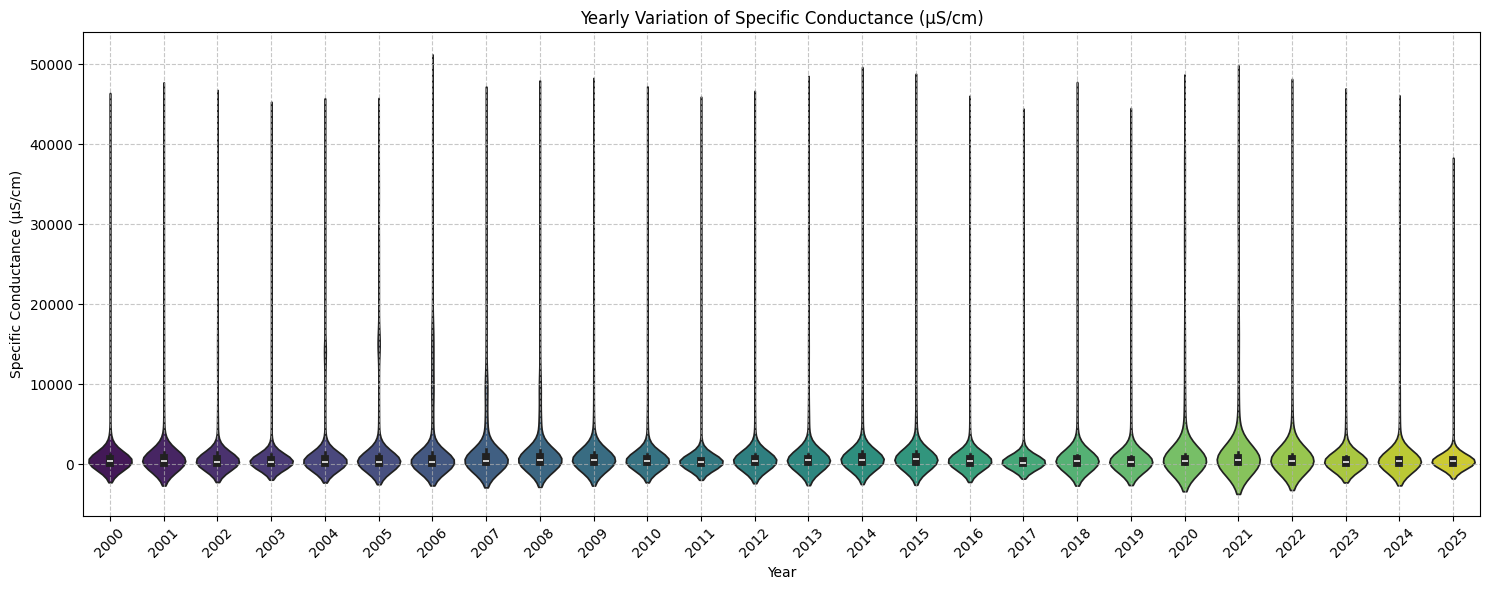

Generated yearly box plot for Specific Conductance.


/tmp/ipython-input-1708802142.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='month', y='SpecificConductance_µS/cm', data=df_pickle, palette='coolwarm')


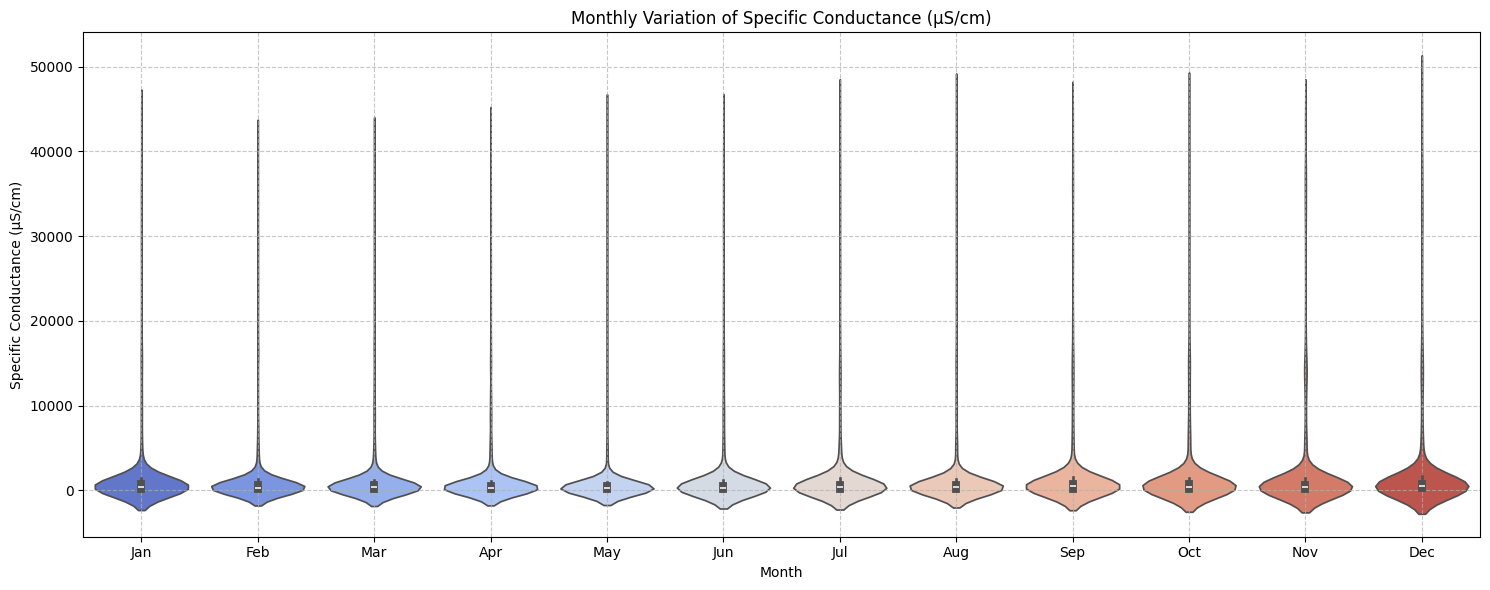

Generated monthly box plot for Specific Conductance.


In [38]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='year', y='SpecificConductance_µS/cm', data=df_pickle, palette='viridis')
plt.title('Yearly Variation of Specific Conductance (µS/cm)')
plt.xlabel('Year')
plt.ylabel('Specific Conductance (µS/cm)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated yearly box plot for Specific Conductance.")

plt.figure(figsize=(15, 6))
sns.violinplot(x='month', y='SpecificConductance_µS/cm', data=df_pickle, palette='coolwarm')
plt.title('Monthly Variation of Specific Conductance (µS/cm)')
plt.xlabel('Month')
plt.ylabel('Specific Conductance (µS/cm)')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated monthly box plot for Specific Conductance.")

## Box Plots for Turbidity Trends (Yearly and Monthly)

/tmp/ipython-input-3797048900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='Turbidity_NTU', data=df_pickle, palette='viridis')


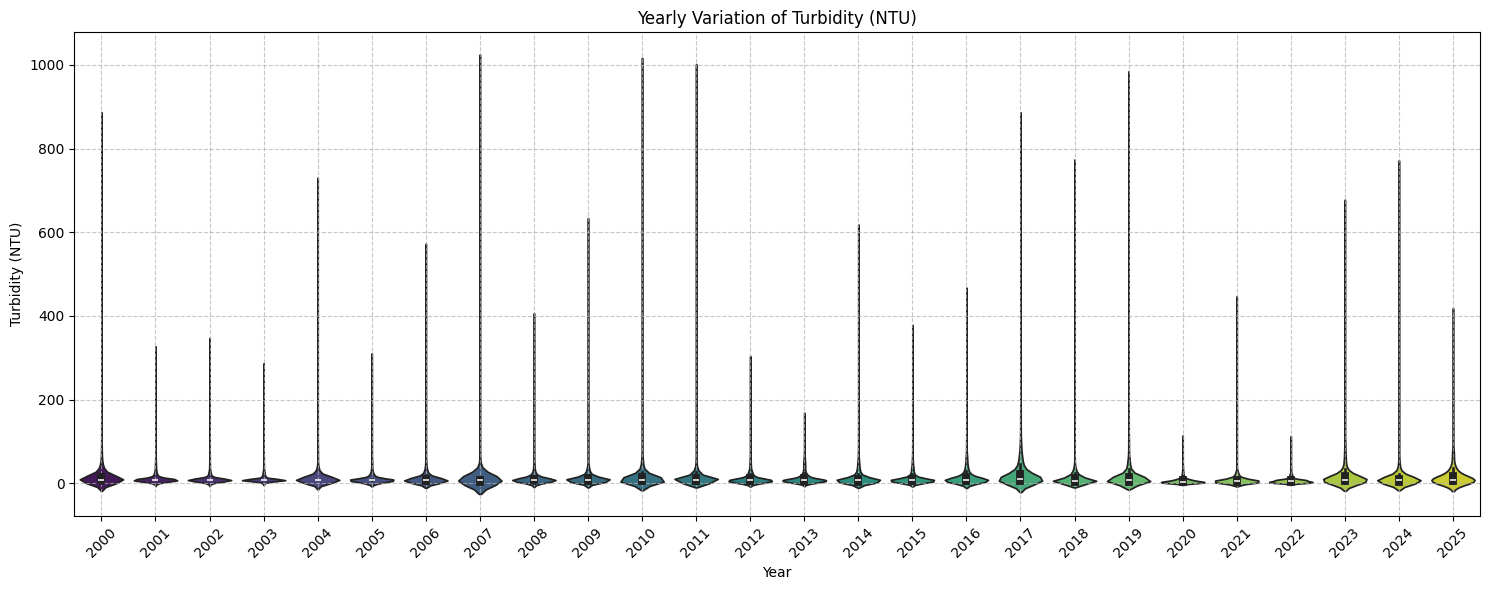

Generated yearly box plot for Turbidity.


/tmp/ipython-input-3797048900.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='month', y='Turbidity_NTU', data=df_pickle, palette='coolwarm')


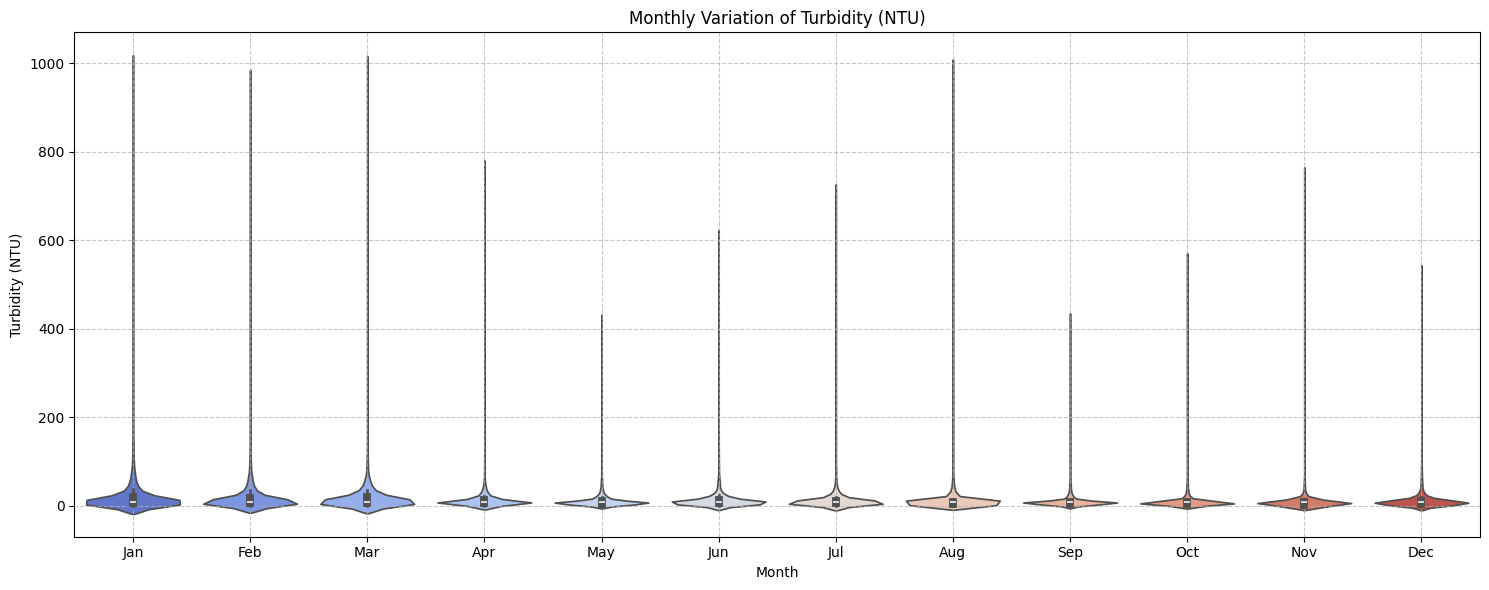

Generated monthly box plot for Turbidity.


In [39]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='year', y='Turbidity_NTU', data=df_pickle, palette='viridis')
plt.title('Yearly Variation of Turbidity (NTU)')
plt.xlabel('Year')
plt.ylabel('Turbidity (NTU)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated yearly box plot for Turbidity.")

plt.figure(figsize=(15, 6))
sns.violinplot(x='month', y='Turbidity_NTU', data=df_pickle, palette='coolwarm')
plt.title('Monthly Variation of Turbidity (NTU)')
plt.xlabel('Month')
plt.ylabel('Turbidity (NTU)')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated monthly box plot for Turbidity.")

## Box Plots for Water Temperature Trends (Yearly and Monthly)

/tmp/ipython-input-3705099882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='WaterTemperature_°C', data=df_pickle, palette='viridis')


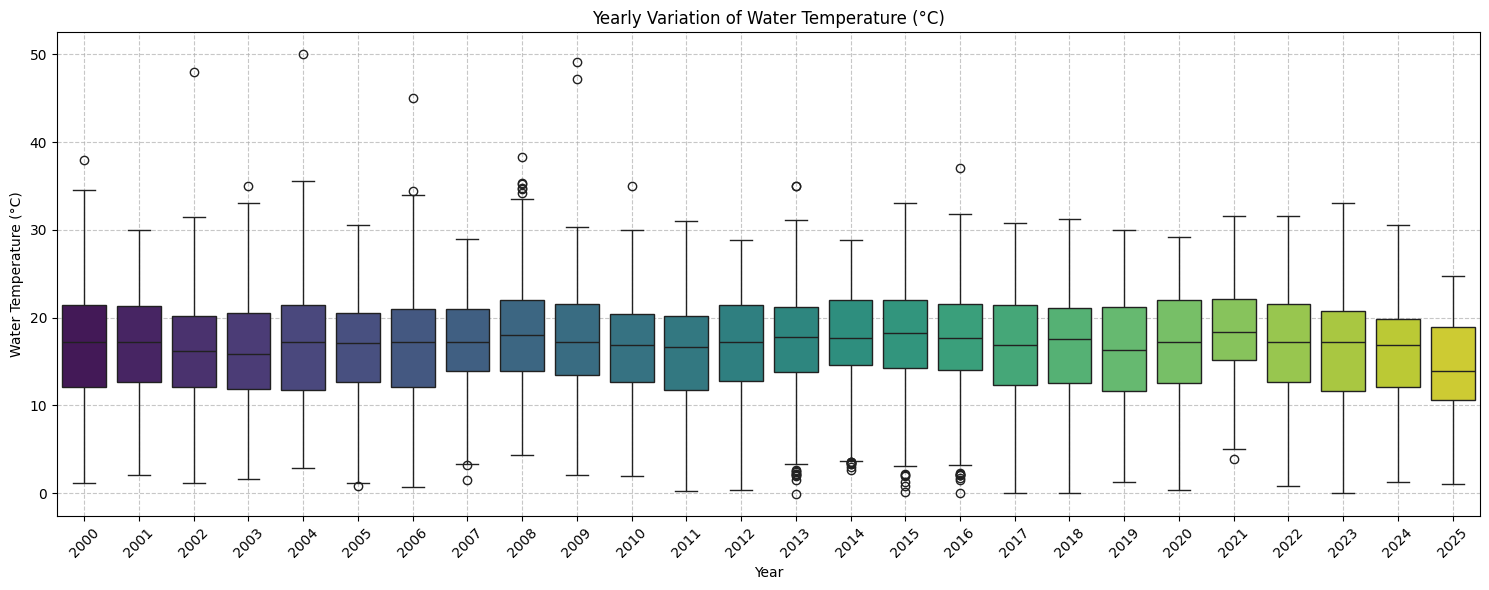

Generated yearly box plot for Water Temperature.


/tmp/ipython-input-3705099882.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='WaterTemperature_°C', data=df_pickle, palette='coolwarm')


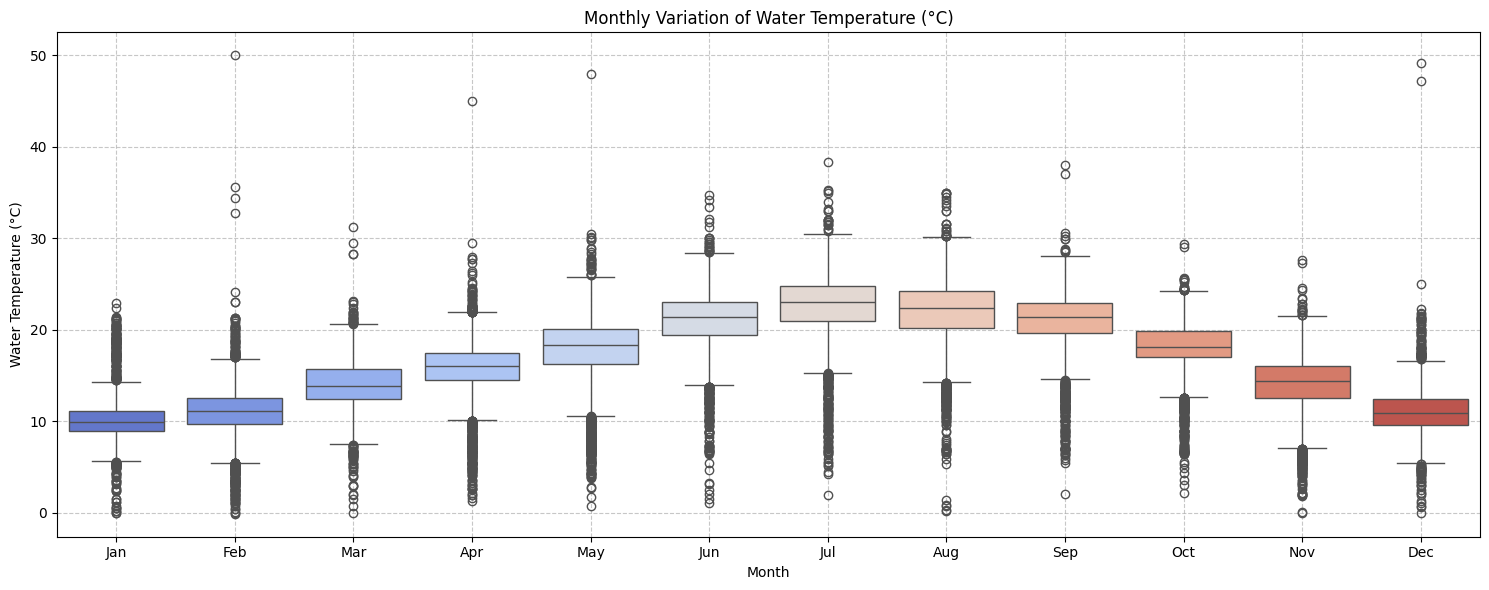

Generated monthly box plot for Water Temperature.


In [40]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='year', y='WaterTemperature_°C', data=df_pickle, palette='viridis')
plt.title('Yearly Variation of Water Temperature (°C)')
plt.xlabel('Year')
plt.ylabel('Water Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated yearly box plot for Water Temperature.")

plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='WaterTemperature_°C', data=df_pickle, palette='coolwarm')
plt.title('Monthly Variation of Water Temperature (°C)')
plt.xlabel('Month')
plt.ylabel('Water Temperature (°C)')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated monthly box plot for Water Temperature.")

## Box Plots for pH Trends (Yearly and Monthly)

/tmp/ipython-input-1230414950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='pH_pH units', data=df_pickle, palette='viridis')


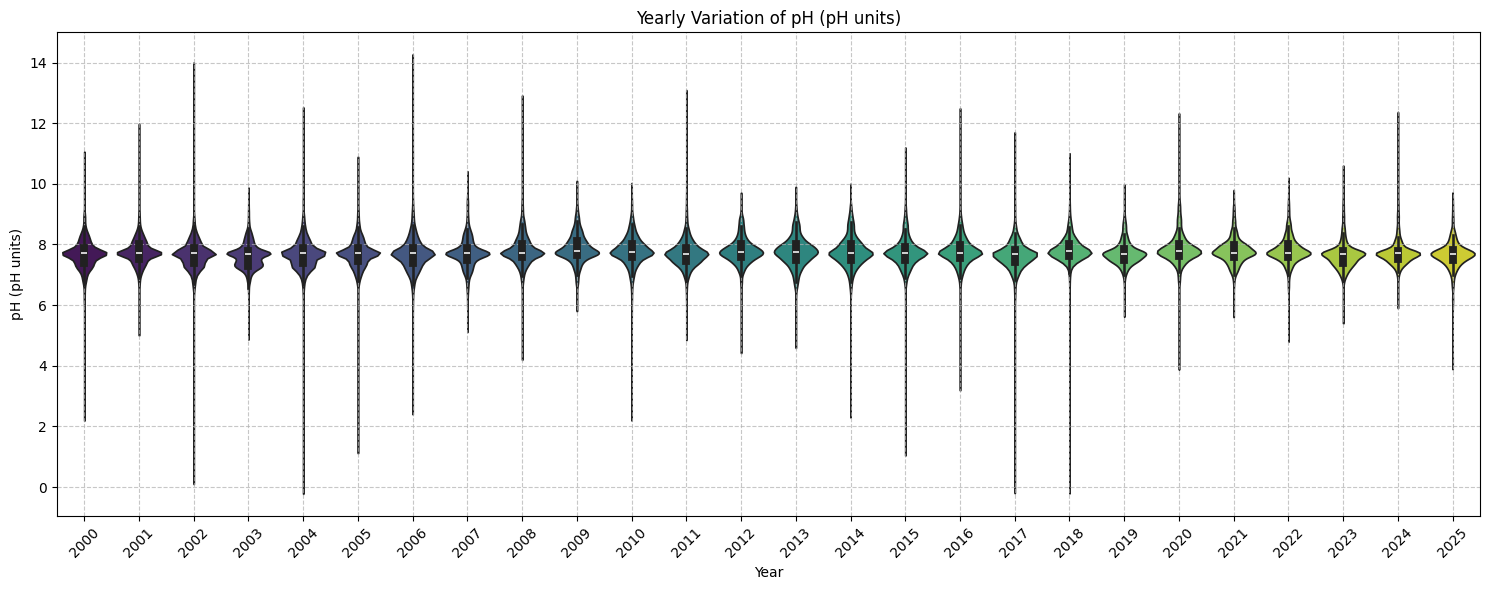

Generated yearly box plot for pH.


/tmp/ipython-input-1230414950.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='month', y='pH_pH units', data=df_pickle, palette='coolwarm')


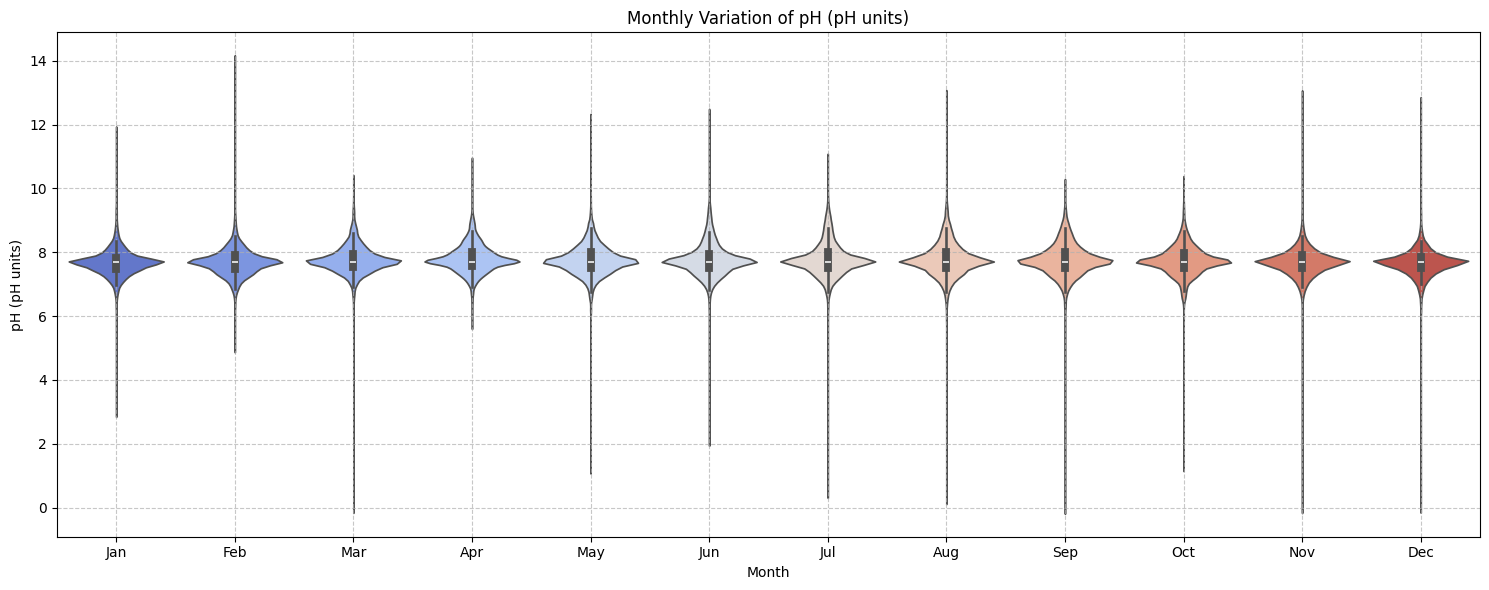

Generated monthly box plot for pH.


In [41]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='year', y='pH_pH units', data=df_pickle, palette='viridis')
plt.title('Yearly Variation of pH (pH units)')
plt.xlabel('Year')
plt.ylabel('pH (pH units)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated yearly box plot for pH.")

plt.figure(figsize=(15, 6))
sns.violinplot(x='month', y='pH_pH units', data=df_pickle, palette='coolwarm')
plt.title('Monthly Variation of pH (pH units)')
plt.xlabel('Month')
plt.ylabel('pH (pH units)')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated monthly box plot for pH.")

## Correlation Matrix of Key Water Quality Parameters

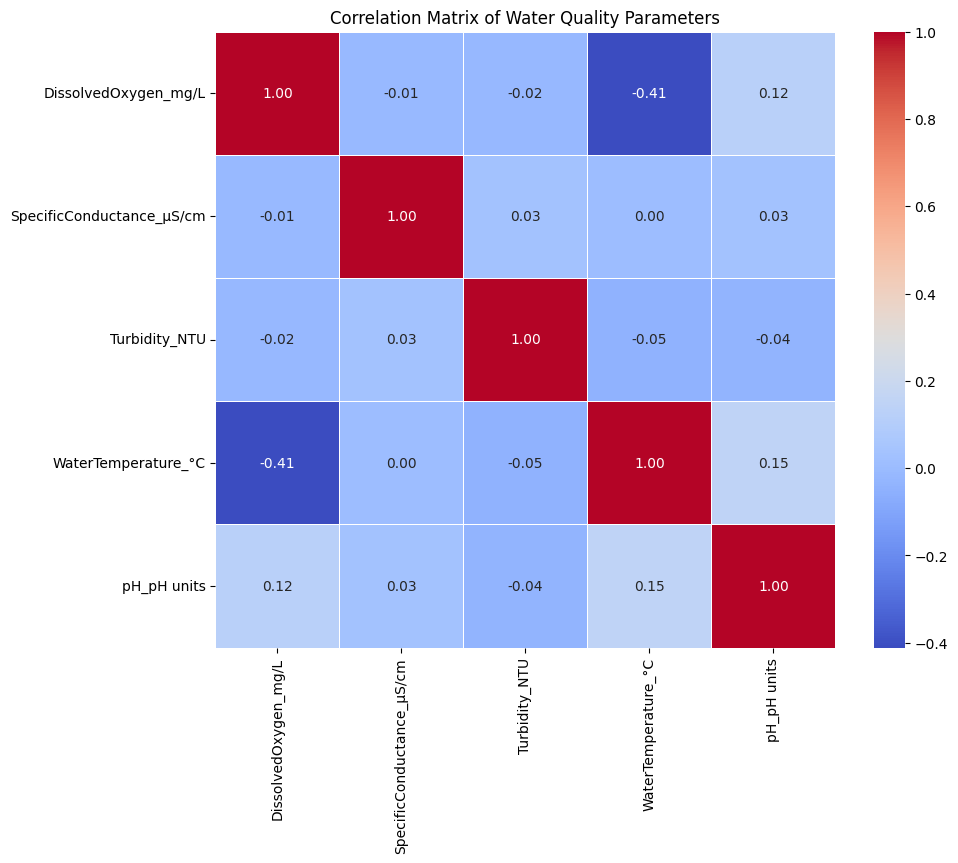

Generated the correlation matrix heatmap for specified parameters.


In [42]:
import seaborn as sns

correlation_cols = [
    'DissolvedOxygen_mg/L',
    'SpecificConductance_µS/cm',
    'Turbidity_NTU',
    'WaterTemperature_°C',
    'pH_pH units'
]

# Calculate the correlation matrix
correlation_matrix = df_pickle[correlation_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Water Quality Parameters')
plt.show()
print("Generated the correlation matrix heatmap for specified parameters.")

## Generate Pairplot

### Subtask:
Create a pairplot to visualize the univariate distributions and pairwise relationships between 'DissolvedOxygen_mg/L', 'SpecificConductance_µS/cm', 'Turbidity_NTU', 'WaterTemperature_°C', and 'pH_pH units'.


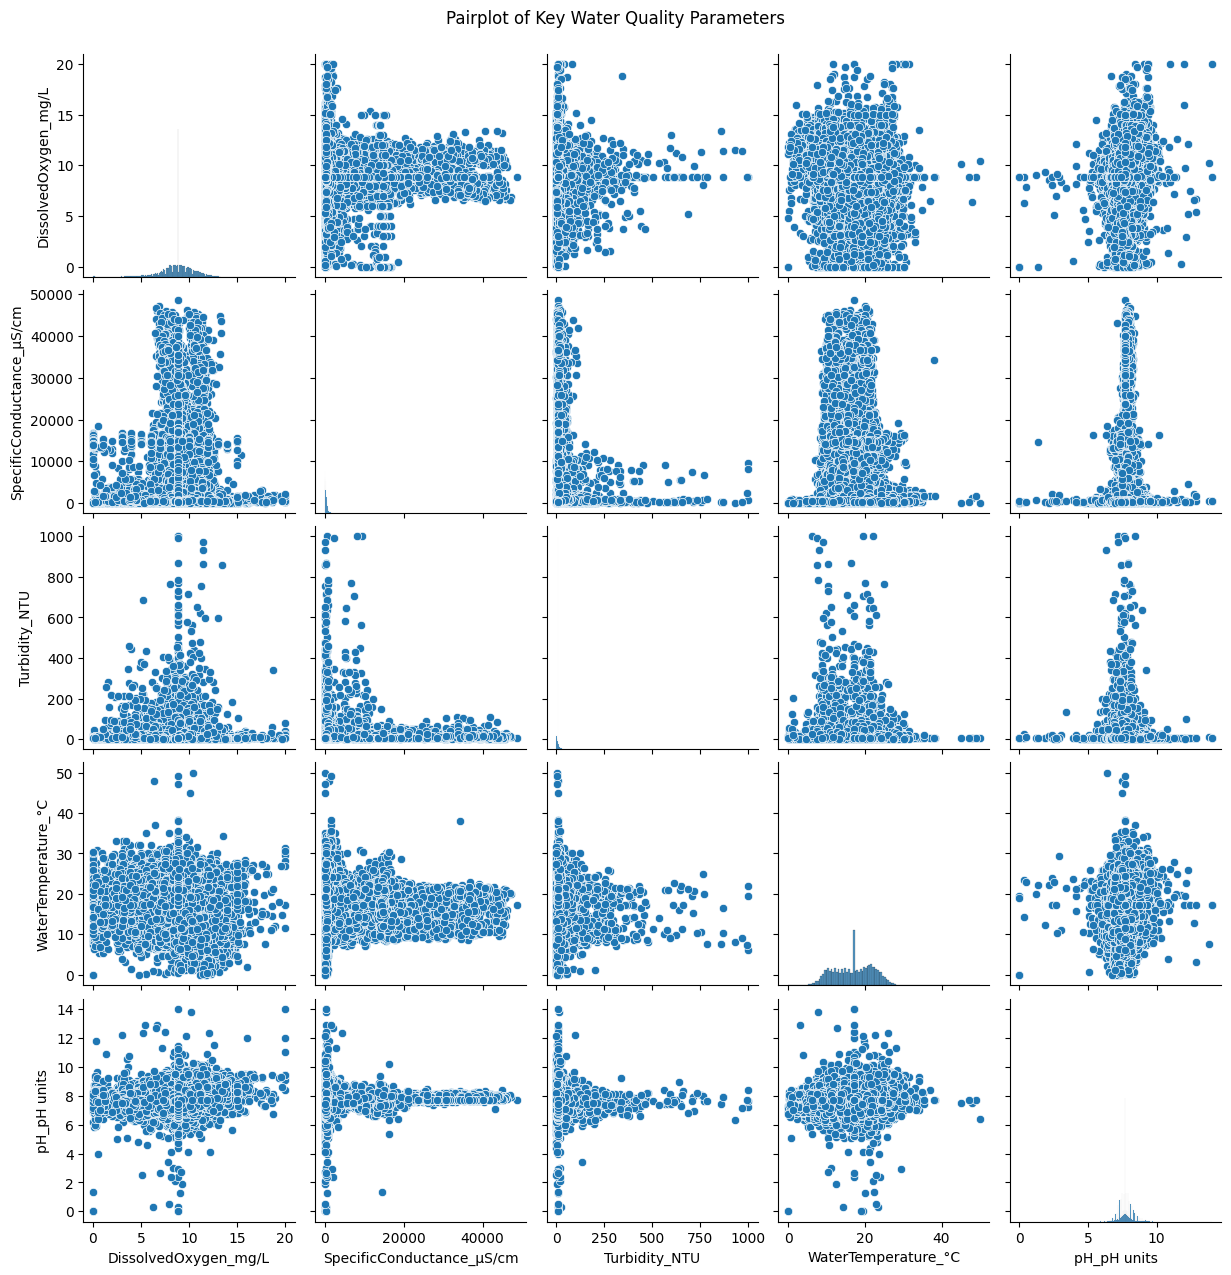

Generated a pairplot showing univariate distributions and pairwise relationships for key water quality parameters.


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_cols = [
    'DissolvedOxygen_mg/L',
    'SpecificConductance_µS/cm',
    'Turbidity_NTU',
    'WaterTemperature_°C',
    'pH_pH units'
]

# Create the pairplot
sns.pairplot(df_pickle[correlation_cols])
plt.suptitle('Pairplot of Key Water Quality Parameters', y=1.02) # Adjust suptitle position
plt.show()
print("Generated a pairplot showing univariate distributions and pairwise relationships for key water quality parameters.")

## Variance of Dissolved Oxygen by County

/tmp/ipython-input-1059929025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=county_do_variance.index, x=county_do_variance.values, palette='viridis')


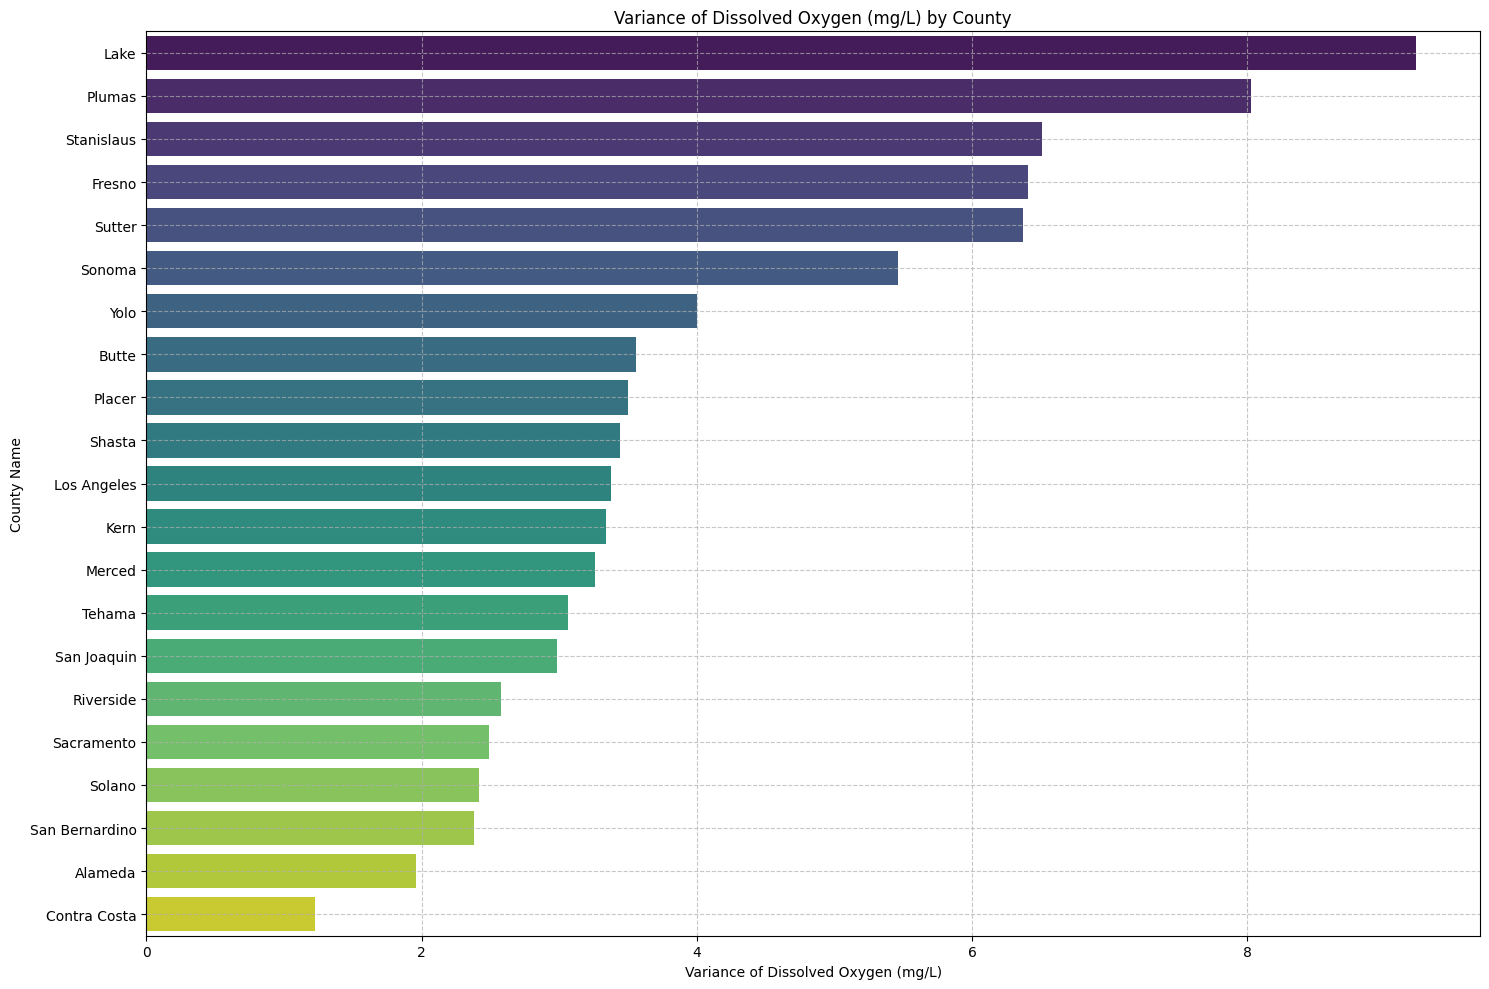

Generated bar plot showing the variance of Dissolved Oxygen by county with swapped axes.


In [44]:
county_do_variance = df_pickle.groupby('county_name')['DissolvedOxygen_mg/L'].var().sort_values(ascending=False)

plt.figure(figsize=(15, 10)) # Increased figure height for readability
sns.barplot(y=county_do_variance.index, x=county_do_variance.values, palette='viridis')
plt.title('Variance of Dissolved Oxygen (mg/L) by County')
plt.ylabel('County Name')
plt.xlabel('Variance of Dissolved Oxygen (mg/L)')
plt.xticks(rotation=0) # No rotation needed for x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated bar plot showing the variance of Dissolved Oxygen by county with swapped axes.")

In [45]:
%ls

'01 documentation'/          ML_Project_ToDoList_GoogleSheets.csv
'02 artifacts'/              ML_Project_ToDoList_GoogleSheets.gsheet
'03 source code'/            predicted_dissolved_oxygen_results.csv
'04 notebooks'/              __pycache__/
'05 results'/                water_quality_utils.py
'Aakash- ProjectPlan.gdoc'   xgb_model_with_lags.pkl
 best_xgb_model.pkl          xgboost_dissolved_oxygen_model.pkl
'List of datasets.gdoc'


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for VIF calculation
vif_cols = [
    'DissolvedOxygen_mg/L',
    'SpecificConductance_µS/cm',
    'Turbidity_NTU',
    'WaterTemperature_°C',
    'pH_pH units'
]

# Create a subset and drop missing values for calculation
X = df_pickle[vif_cols].dropna()

# Add a constant column (intercept) as it's required for VIF calculation
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filter out the constant term for visualization
vif_data = vif_data[vif_data['Feature'] != 'const']

print("Variance Inflation Factors:")
display(vif_data)

Variance Inflation Factors:


Feature       VIF
1       DissolvedOxygen_mg/L  1.256841
2  SpecificConductance_µS/cm  1.002413
3              Turbidity_NTU  1.005262
4        WaterTemperature_°C  1.266865
5                pH_pH units  1.067219

/tmp/ipython-input-2277682919.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


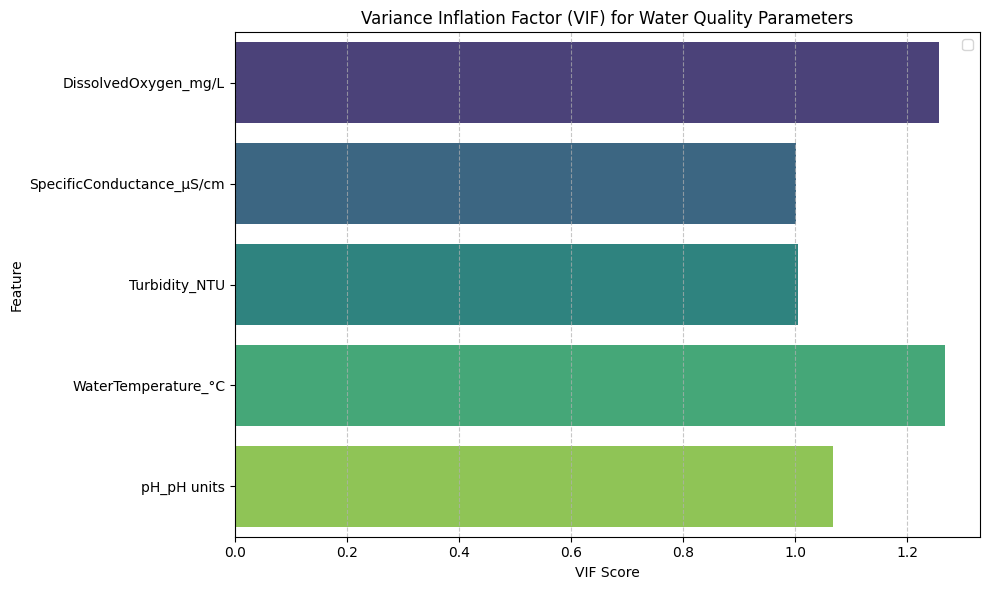

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, hue='Feature', legend=False, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Water Quality Parameters')
plt.xlabel('VIF Score')
plt.ylabel('Feature')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
agg_cols = ['WQI', 'DissolvedOxygen_mg/L', 'SpecificConductance_µS/cm', 'Turbidity_NTU', 'WaterTemperature_°C', 'pH_pH units']

station_avg = df_pickle.groupby(['station_id', 'latitude', 'longitude'])[agg_cols].mean().reset_index()
print("Aggregated data by station.")
display(station_avg.head())

Aggregated data by station.


station_id  latitude  longitude        WQI  DissolvedOxygen_mg/L  \
0           1   38.5596  -121.4169  86.705694              9.763639   
1          10   37.8298  -121.5574  77.292095              8.275911   
2          12   37.8019  -121.6203  79.300995              8.816093   
3          73   38.7993  -121.7252  66.363084              7.170592   
4          75   37.6399  -121.2277  72.120182              7.987391   

   SpecificConductance_µS/cm  Turbidity_NTU  WaterTemperature_°C  pH_pH units  
0                  63.883113       4.205026            15.293010     7.577644  
1                 410.639936      12.200958            17.687540     7.644952  
2                 427.829457       9.948574            17.245039     7.750868  
3                 588.779809      44.415461            18.662632     7.601974  
4                 800.868116       8.027536            17.370290     7.908551

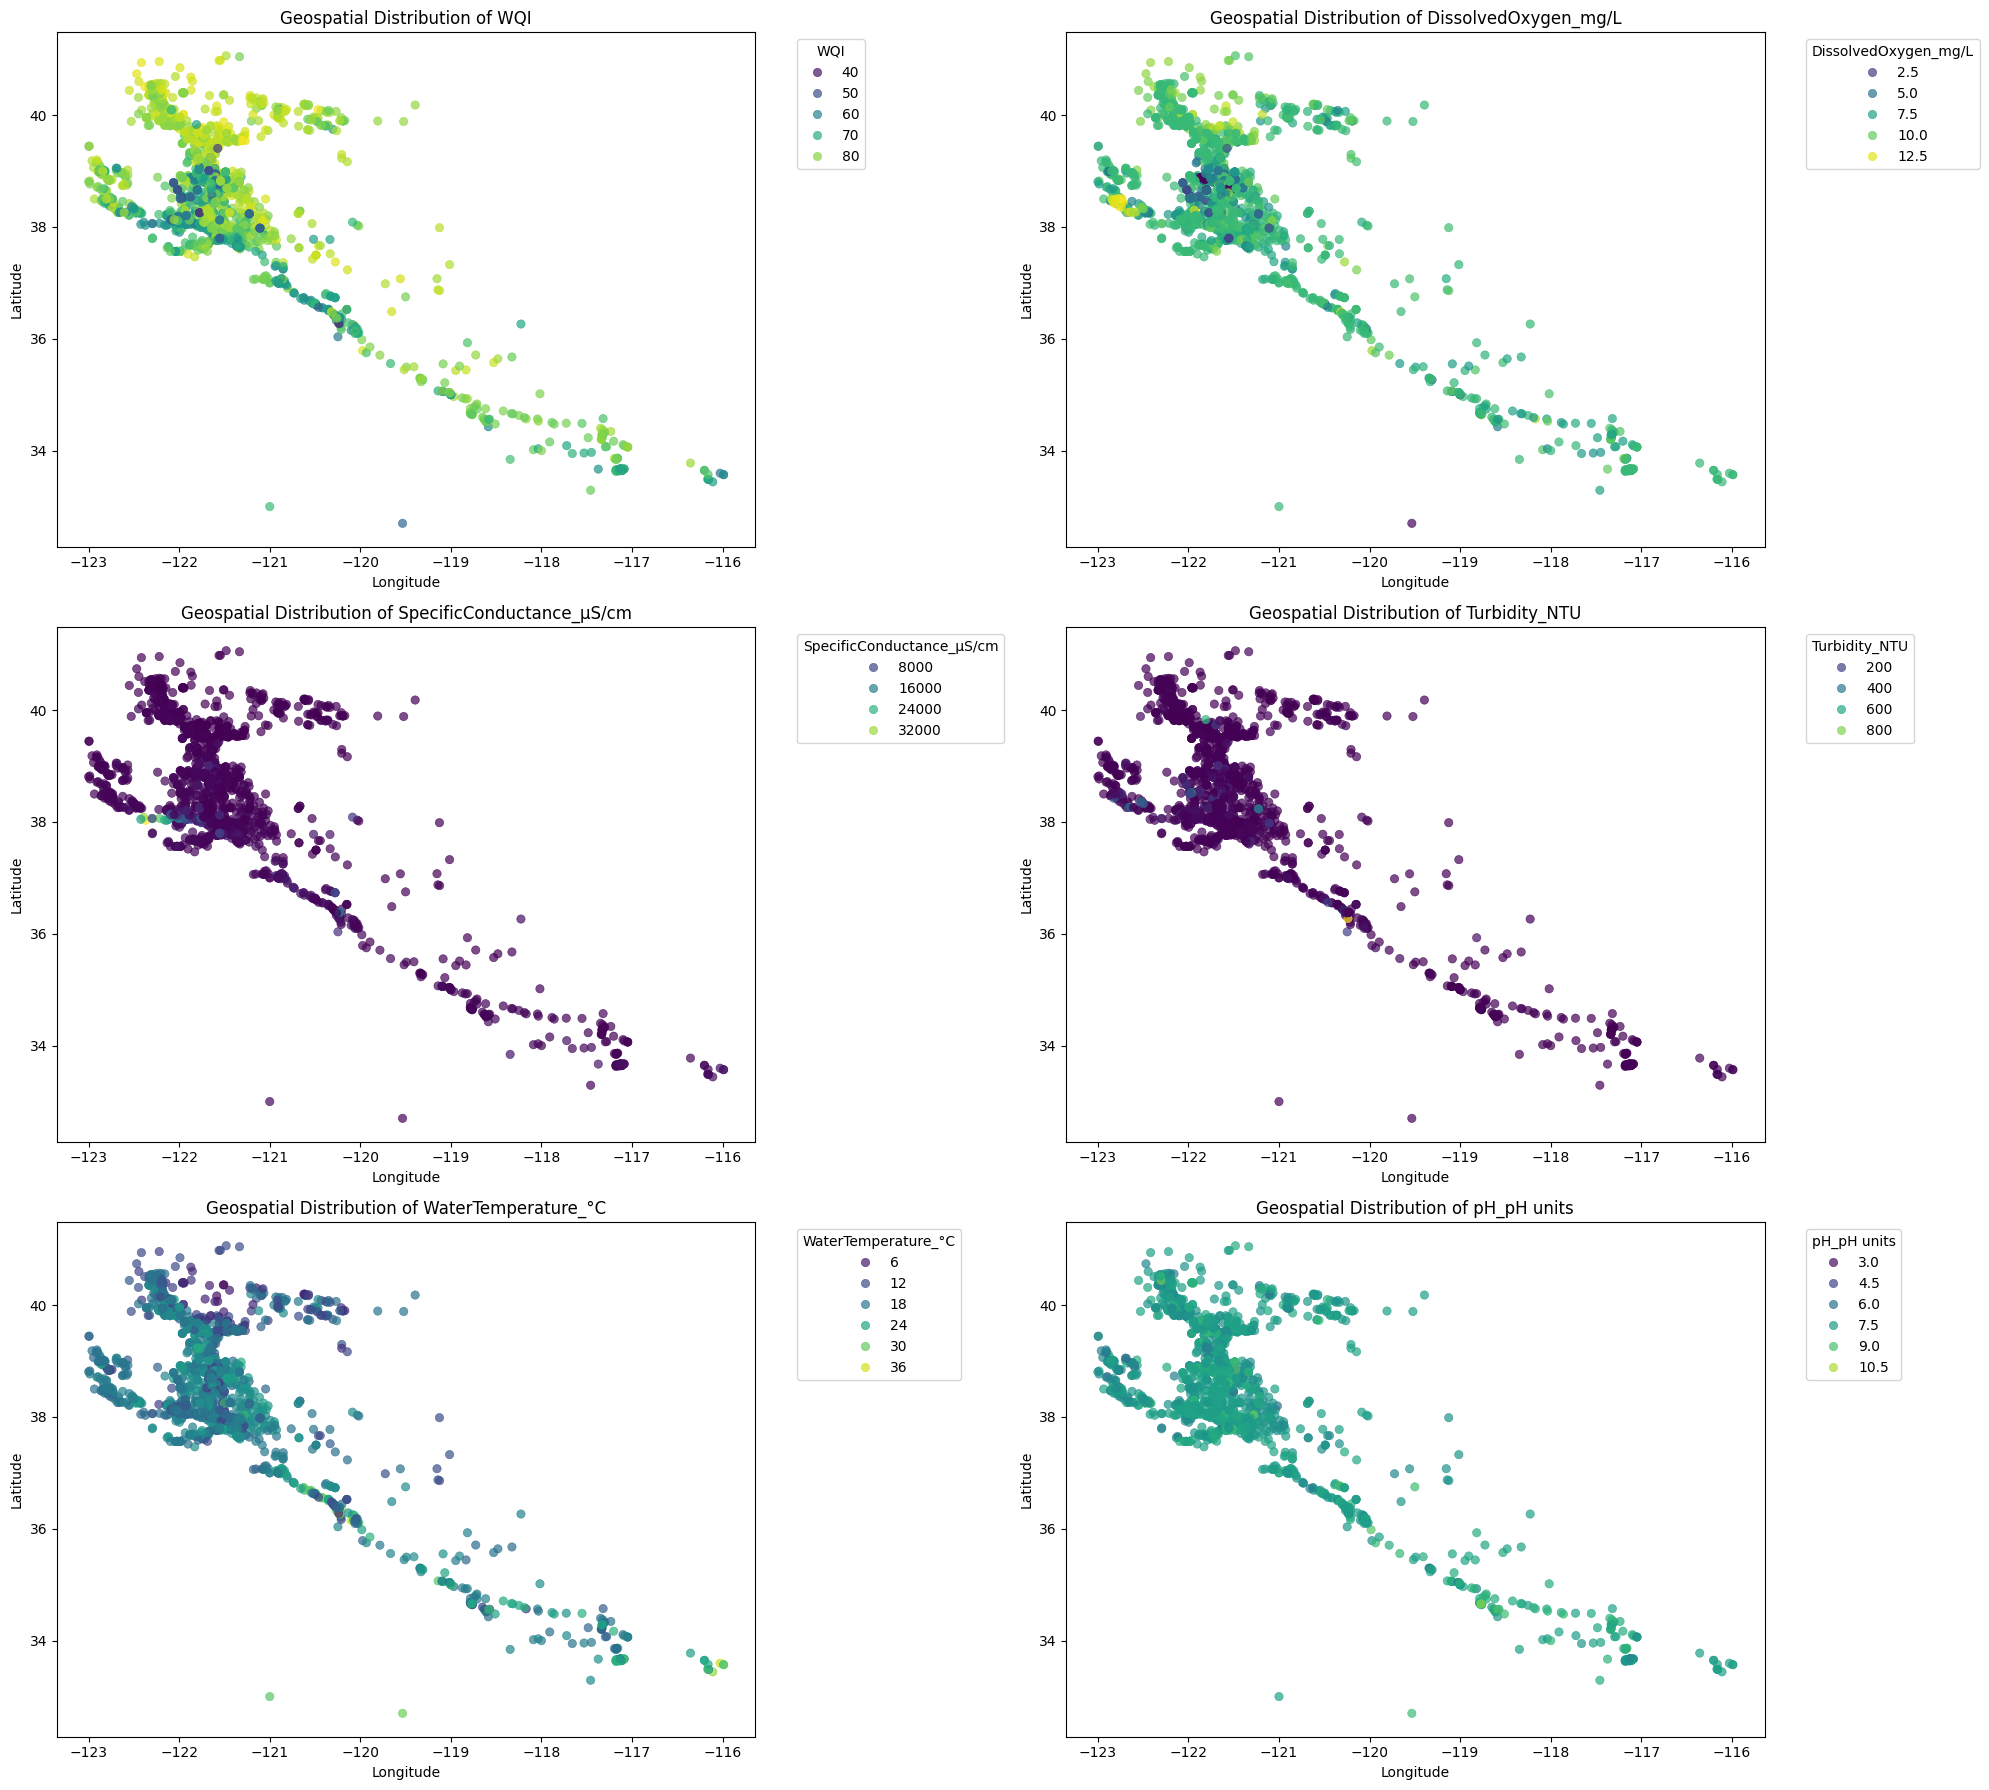

Generated geospatial scatter plots for key water quality parameters.


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters to plot
plot_cols = ['WQI', 'DissolvedOxygen_mg/L', 'SpecificConductance_µS/cm',
             'Turbidity_NTU', 'WaterTemperature_°C', 'pH_pH units']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
axes = axes.flatten()

# Generate a scatter plot for each parameter
for i, col in enumerate(plot_cols):
    sns.scatterplot(
        x='longitude',
        y='latitude',
        hue=col,
        data=station_avg,
        ax=axes[i],
        palette='viridis',
        edgecolor=None,
        alpha=0.7
    )
    axes[i].set_title(f'Geospatial Distribution of {col}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
    axes[i].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
print("Generated geospatial scatter plots for key water quality parameters.")